In [1]:
import ndlib
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from ndlib.utils import multi_runs
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

no display found. Using non-interactive Agg backend


 First we look for the restaurants that have vegan options and get their respective nodes. 

In [2]:
data = pd.read_csv('tuscany.csv')
df = pd.DataFrame(data)

In [3]:
array= ['Vegetarian Friendly, Vegan Options, Gluten Free Options', 'Vegetarian Friendly, Vegan Options', 'Vegetarian Friendly, Gluten Free Options, Vegan Options', 'Vegan Options', 'Vegan Options, Gluten Free Options, Vegetarian Friendly', 
        'Vegan Options, Vegetarian Friendly', 'Vegan Options, Gluten Free Options', 'Vegan Options, Vegetarian Friendly, Gluten Free Options', 'Gluten Free Options, Vegetarian Friendly, Vegan Options', 'Vegetarian Friendly, Vegan Options, Halal', 
        'Halal, Vegetarian Friendly, Vegan Options', 'Vegetarian Friendly, Vegan Options, Halal, Gluten Free Options', 'Gluten Free Options, Vegan Options', 'Vegan Options, Halal, Vegetarian Friendly', 'Vegetarian Friendly, Vegan Options, Kosher, Gluten Free Options']
A=df['Unnamed: 0'].loc[df['specialDiets'].isin(array)]
vegan_nodes=A.to_numpy()

In [4]:
g = nx.read_weighted_edgelist("RW.weighted.edgelist", nodetype=int)
ER = nx.read_weighted_edgelist("ER.weighted.edgelist", nodetype=int)
WS = nx.read_weighted_edgelist("WS.weighted.edgelist", nodetype=int)
BA = nx.read_weighted_edgelist("BA.weighted.edgelist", nodetype=int)

<a id="si"></a>
### SI: Susceptible-Infected

Each individual has β contacts with randomly chosen others individuals per unit time.

If there are I infected individual and S susceptible individuals, the average rate of new infection is βsi/N

In our case the infected individuals represent the ones that have the information of vegan options while the suceptible
individuals are those that have yet to learn about it.  

In [5]:
model   = ep.SIModel(g)
modelb  = ep.SIModel(g) 
modelER = ep.SIModel(ER)
modelWS = ep.SIModel(WS)
modelBA = ep.SIModel(BA)

In [6]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [7]:
cfg  = mc.Configuration()
cfg.add_model_parameter('beta', 0.005) # infection rate
cfg.add_model_parameter("percentage_infected", 0.14) # Random starting percentage
cfgb = cfg
cfgb.add_model_initial_configuration("Infected", vegan_nodes) # Setting the nodes that have vegan options
model.set_initial_status(cfg)
modelb.set_initial_status(cfgb)
modelER.set_initial_status(cfg)
modelWS.set_initial_status(cfg)
modelBA.set_initial_status(cfg)

In [8]:
iterations   = model.iteration_bunch(100, node_status=True)
iterationsb  = modelb.iteration_bunch(100, node_status=True)
iterationsER = modelER.iteration_bunch(100, node_status=True)
iterationsWS = modelWS.iteration_bunch(100, node_status=True)
iterationsBA = modelBA.iteration_bunch(100, node_status=True)

trends   = model.build_trends(iterations)
trendsb  = modelb.build_trends(iterationsb)
trendsER = modelER.build_trends(iterationsER)
trendsWS = modelWS.build_trends(iterationsWS)
trendsBA = modelBA.build_trends(iterationsBA)

100%|██████████| 100/100 [00:08<00:00, 11.64it/s]


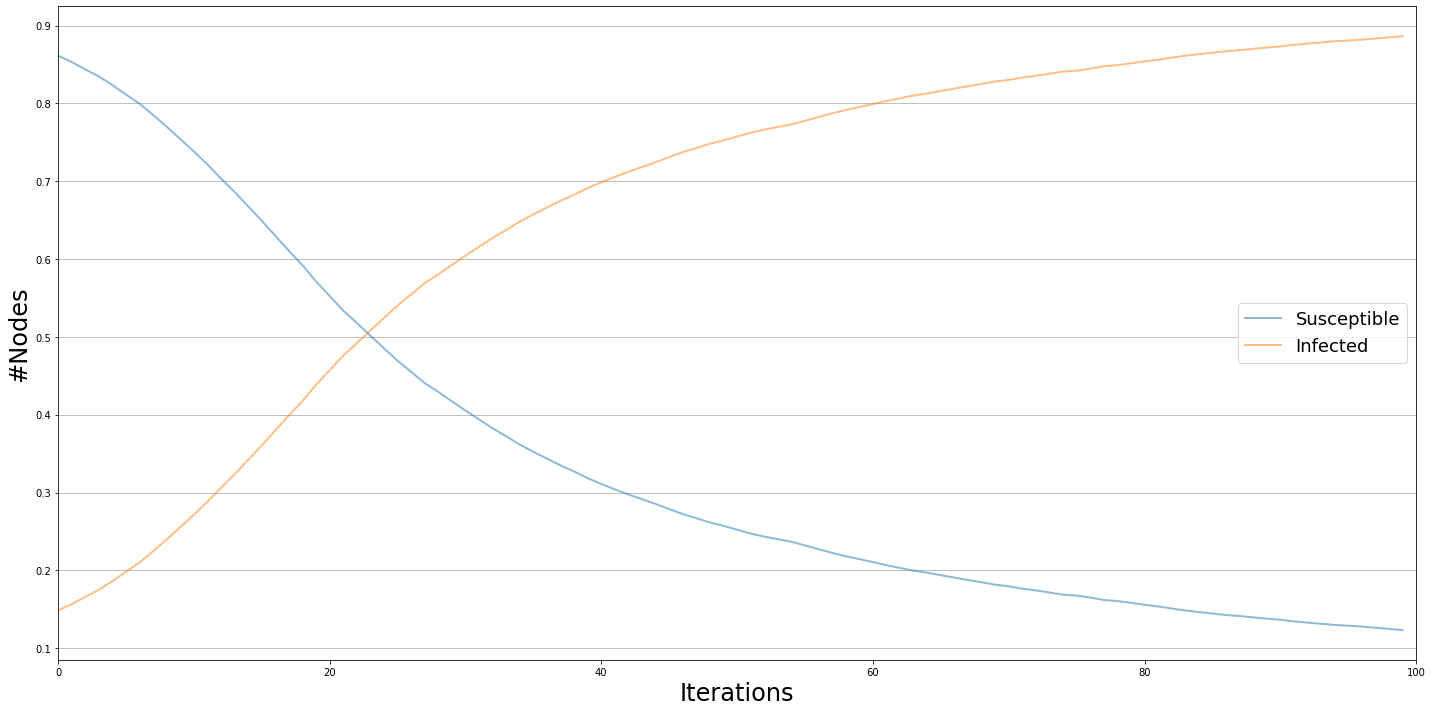

In [9]:
%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()

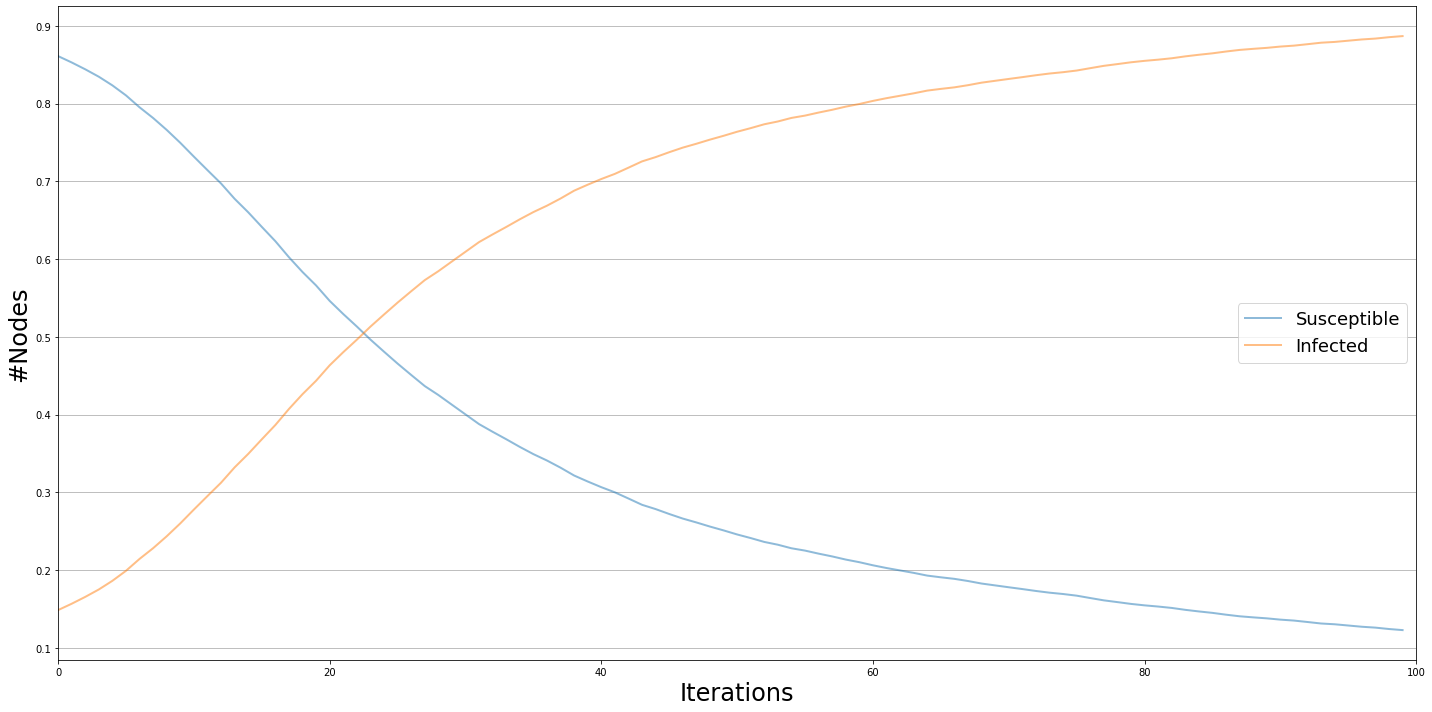

In [10]:
%matplotlib inline
viz = DiffusionTrend(modelb, trendsb)
viz.plot()

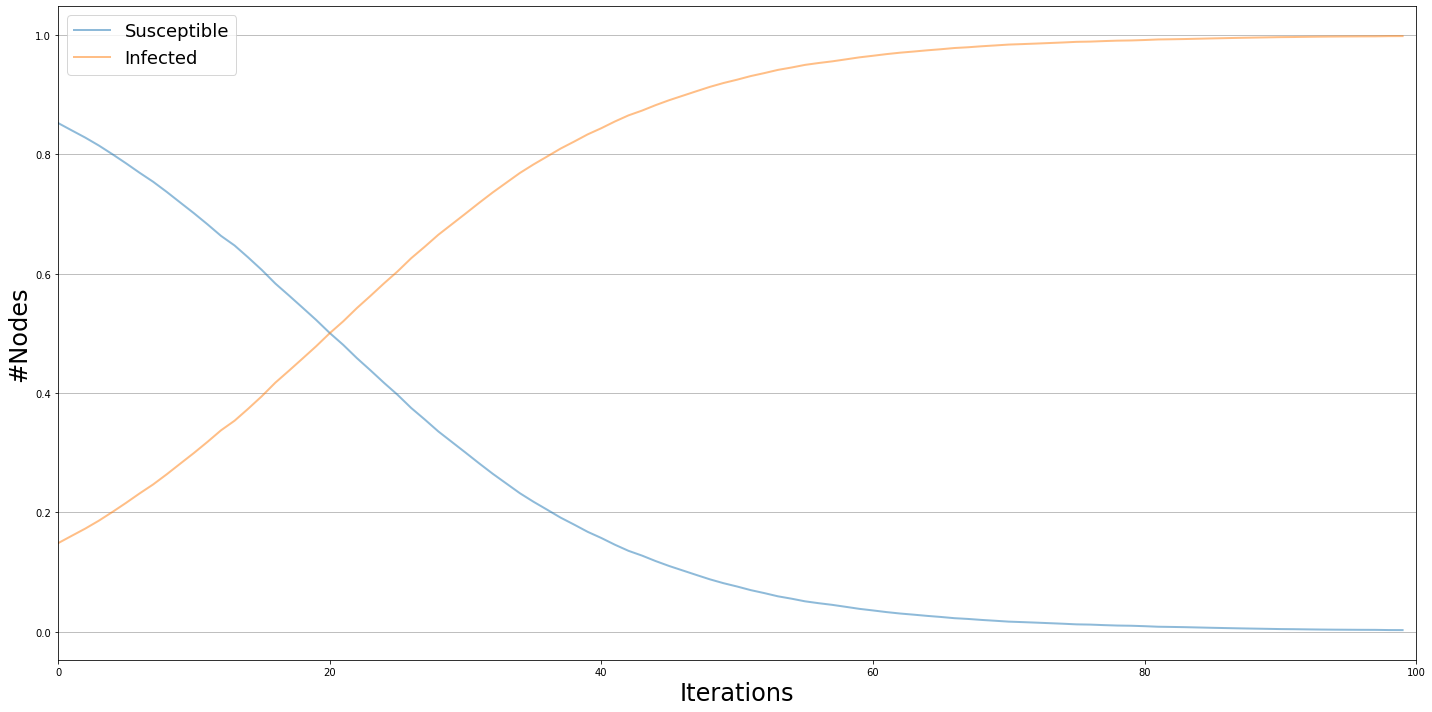

In [11]:
%matplotlib inline
viz = DiffusionTrend(modelER, trendsER)
viz.plot()

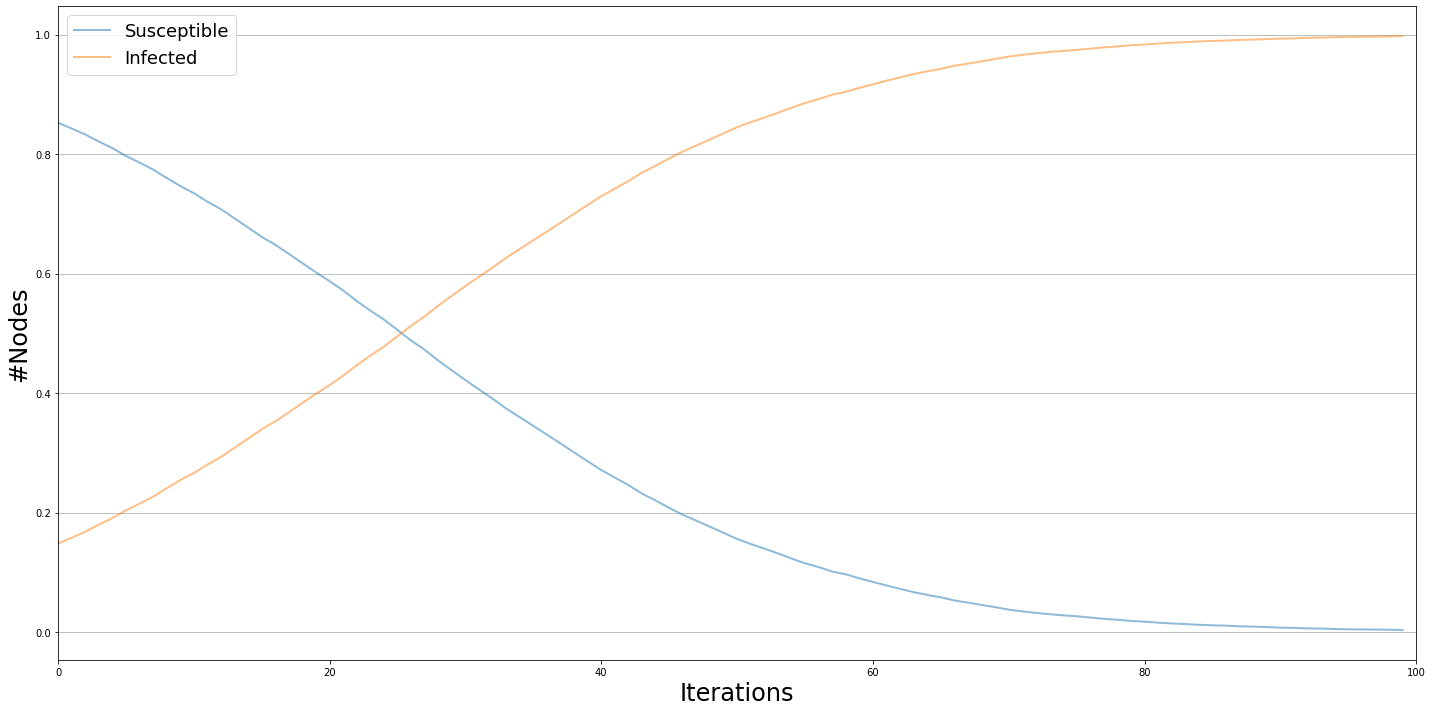

In [12]:
%matplotlib inline
viz = DiffusionTrend(modelWS, trendsWS)
viz.plot()

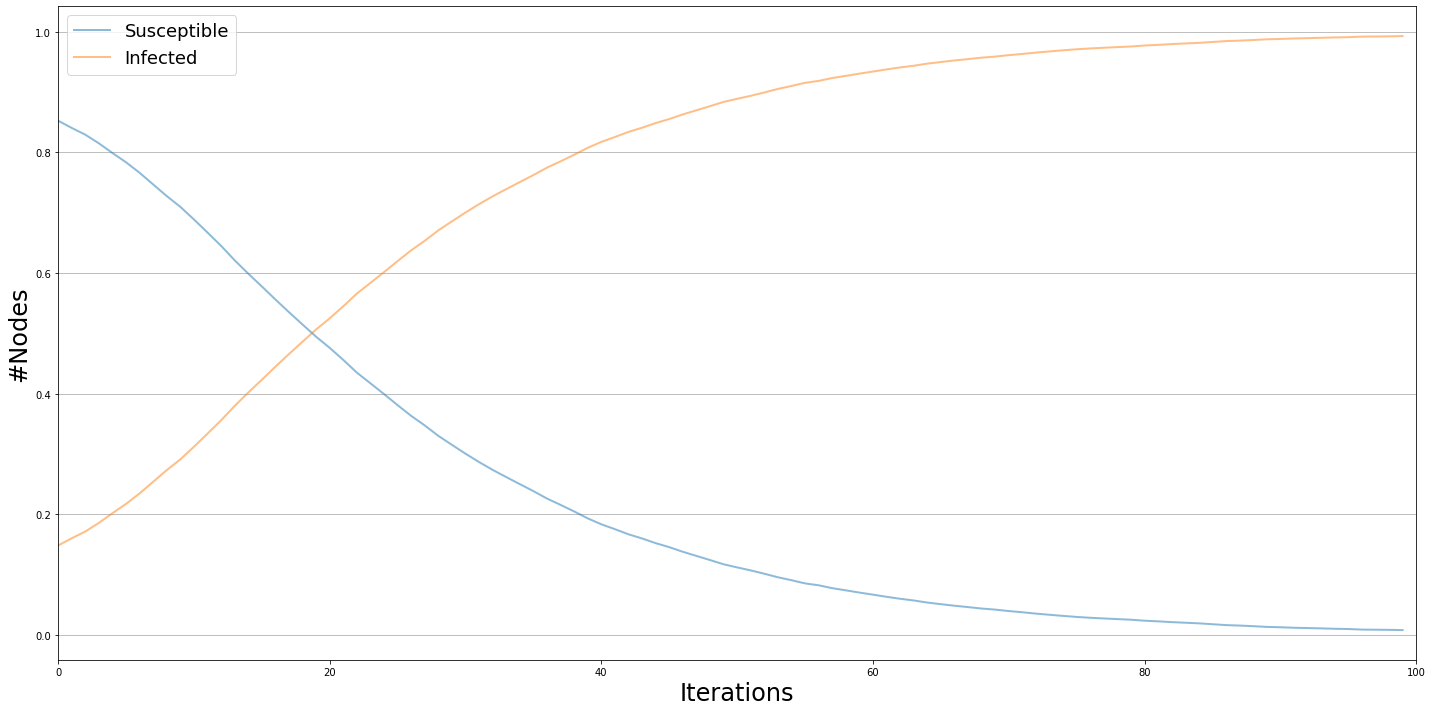

In [13]:
%matplotlib inline
viz = DiffusionTrend(modelBA, trendsBA)
viz.plot()

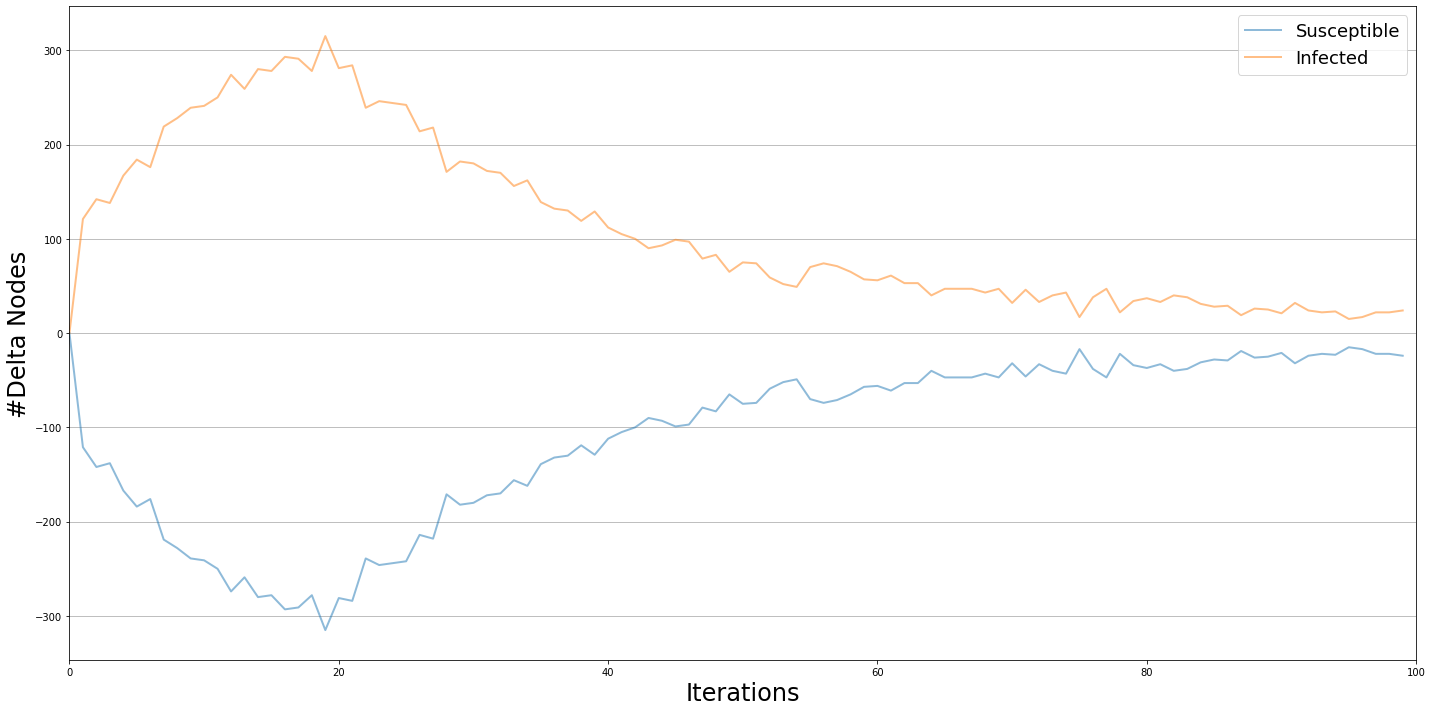

In [14]:
%matplotlib inline
viz = DiffusionPrevalence(model, trends)
viz.plot()

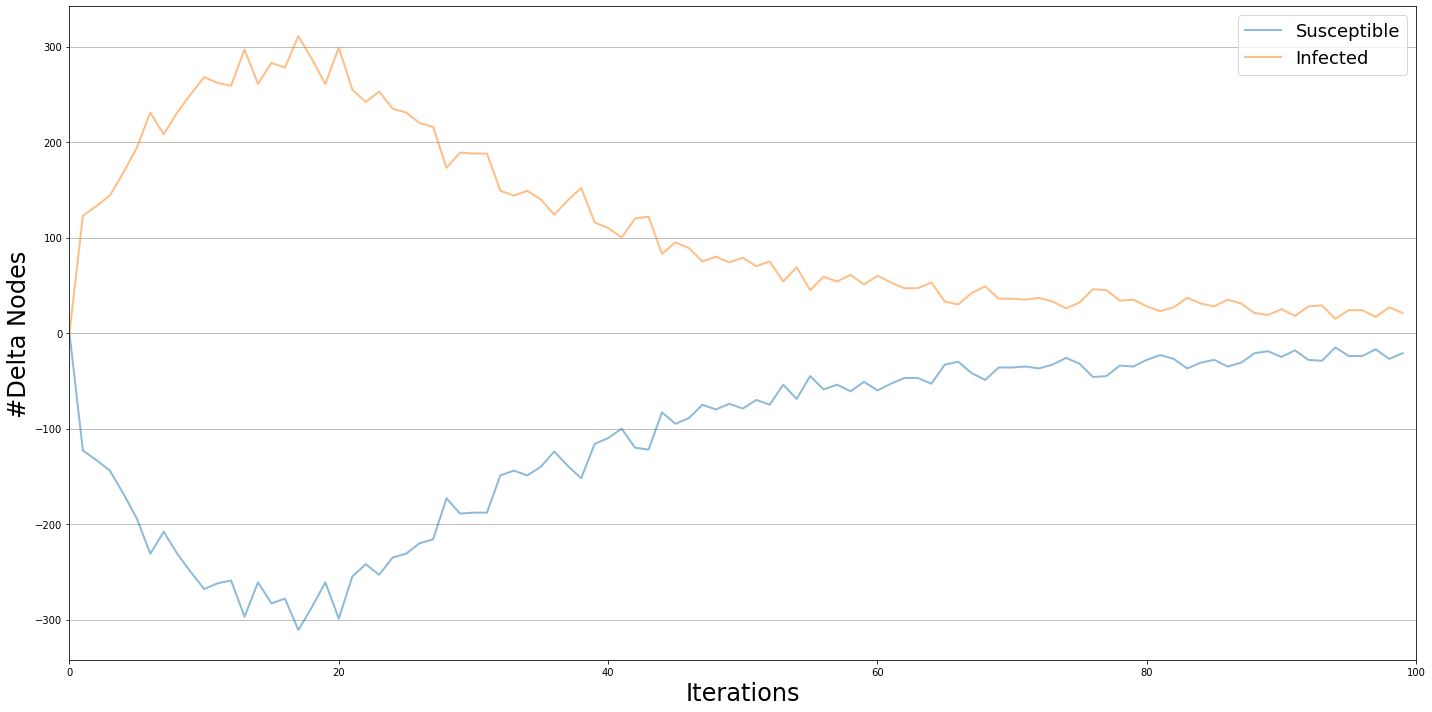

In [15]:
%matplotlib inline
viz = DiffusionPrevalence(modelb, trendsb)
viz.plot()

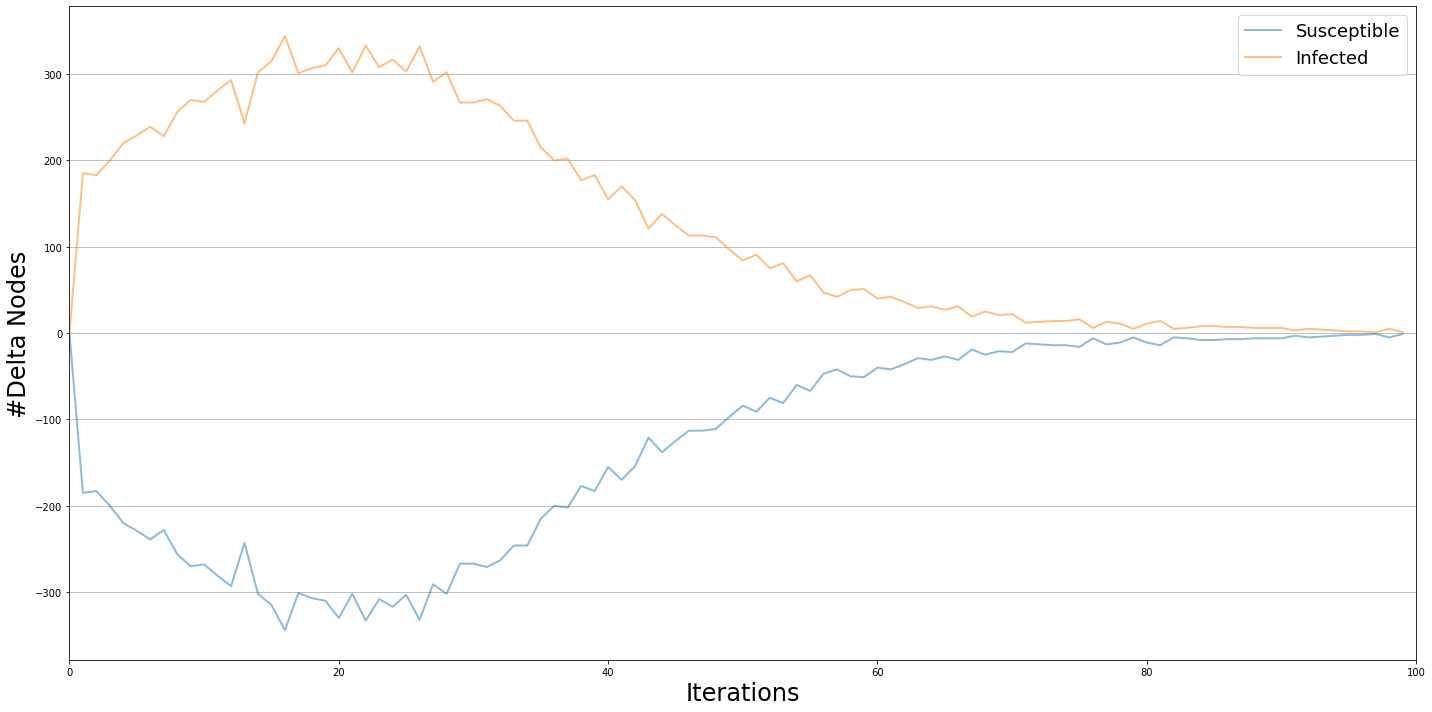

In [16]:
%matplotlib inline
viz = DiffusionPrevalence(modelER, trendsER)
viz.plot()

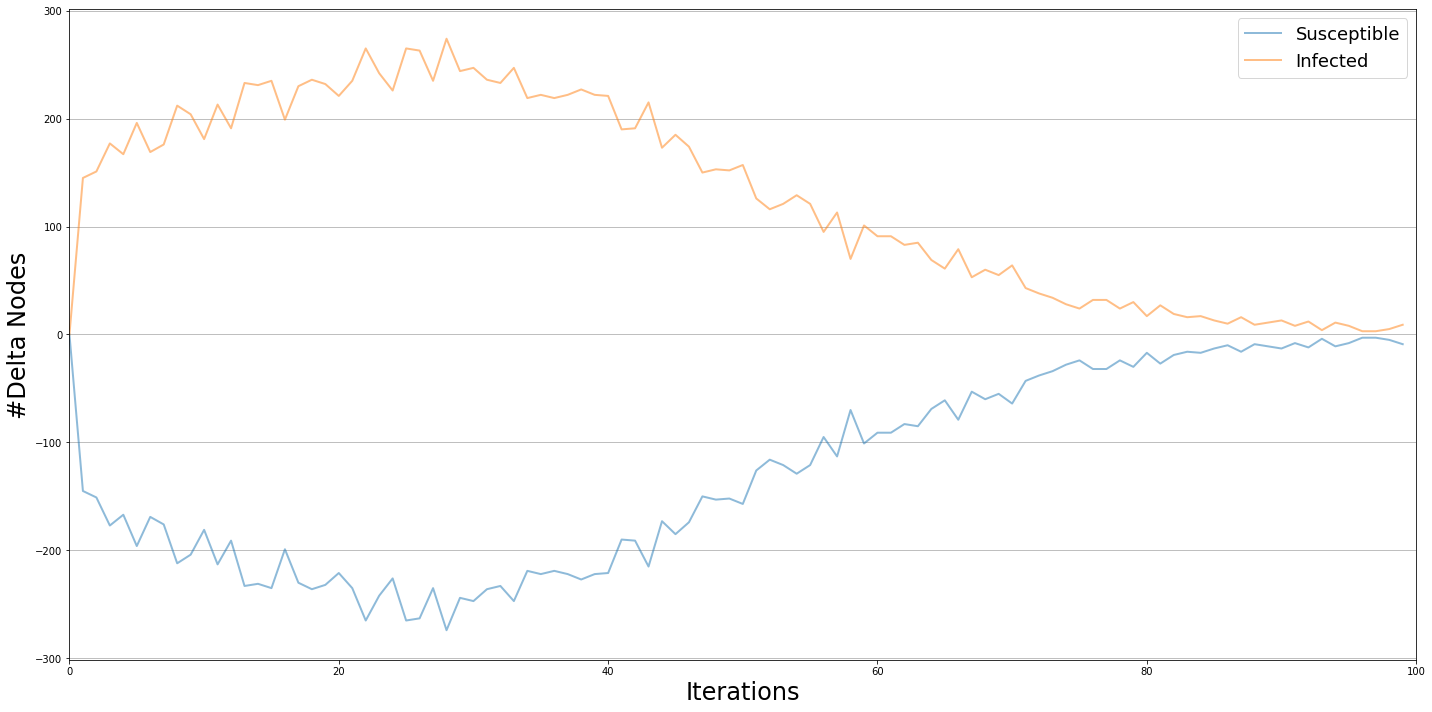

In [17]:
%matplotlib inline
viz = DiffusionPrevalence(modelWS, trendsWS)
viz.plot()

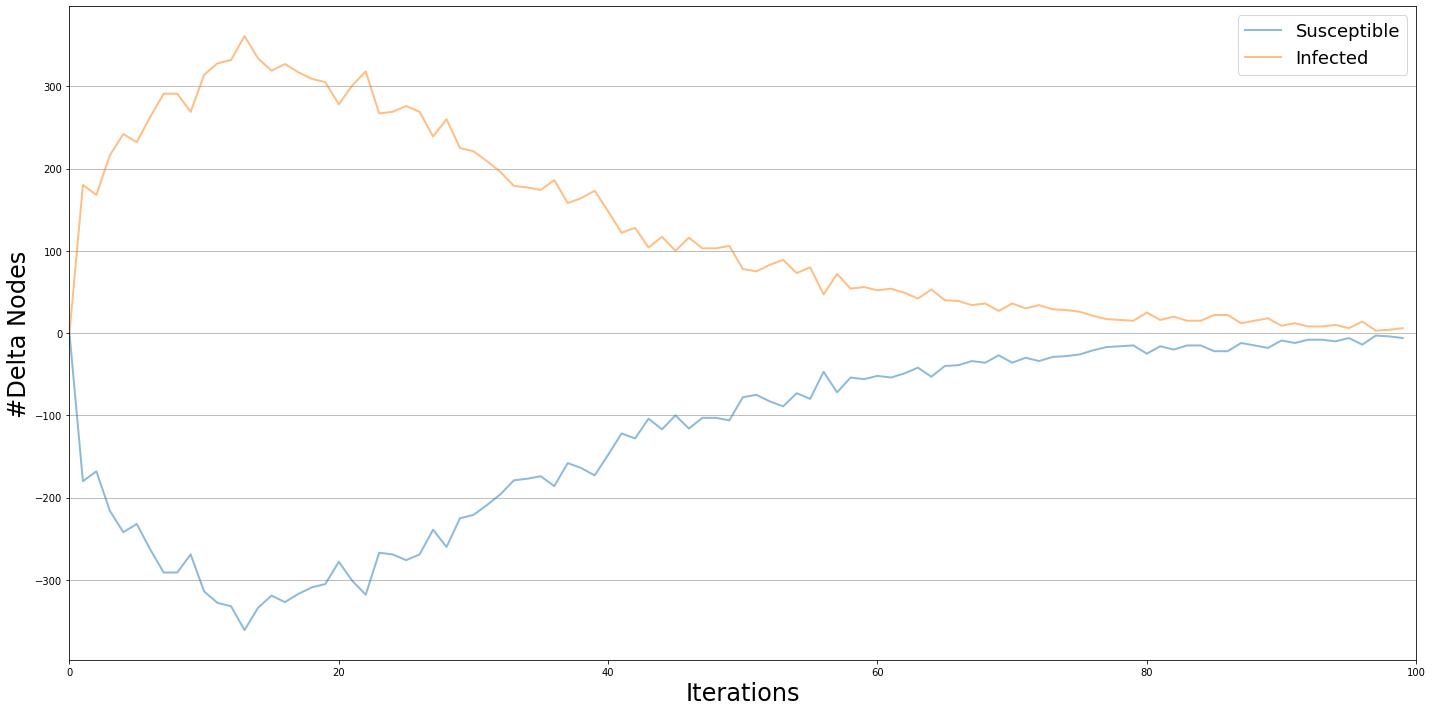

In [18]:
%matplotlib inline
viz = DiffusionPrevalence(modelBA, trendsBA)
viz.plot()

<a id="sir"></a>
### Standard Threshold Model:
The node’s individual decision depends on the percentage of its neighbors that have made the same choice, thus imposing a threshold.

In [19]:
model   = ep.ThresholdModel(g)
modelb  = ep.ThresholdModel(g) 
modelER = ep.ThresholdModel(ER)
modelWS = ep.ThresholdModel(WS)
modelBA = ep.ThresholdModel(BA)

In [20]:
config  = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.14)
configER = config
configWS = config
configBA = config

configb = mc.Configuration()
configb.add_model_initial_configuration("Infected", vegan_nodes)
threshold = 0.35

for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)
model.set_initial_status(config)

for i in g.nodes():
    configb.add_node_configuration("threshold", i, threshold)
modelb.set_initial_status(configb)

for i in ER.nodes():
    configER.add_node_configuration("threshold", i, threshold)
modelER.set_initial_status(configER)

for i in WS.nodes():
    configWS.add_node_configuration("threshold", i, threshold)
modelWS.set_initial_status(configWS)

for i in BA.nodes():
    configBA.add_node_configuration("threshold", i, threshold)
modelBA.set_initial_status(configBA)

In [21]:
iterations   = model.iteration_bunch(100)
iterationsb  = modelb.iteration_bunch(100)
iterationsER = modelER.iteration_bunch(100)
iterationsWS = modelWS.iteration_bunch(100)
iterationsBA = modelBA.iteration_bunch(100)

100%|██████████| 100/100 [00:09<00:00, 10.14it/s]


In [22]:
trends   = model.build_trends(iterations)
trendsb  = model.build_trends(iterationsb)
trendsER = modelER.build_trends(iterationsER)
trendsWS = modelWS.build_trends(iterationsWS)
trendsBA = modelBA.build_trends(iterationsBA)

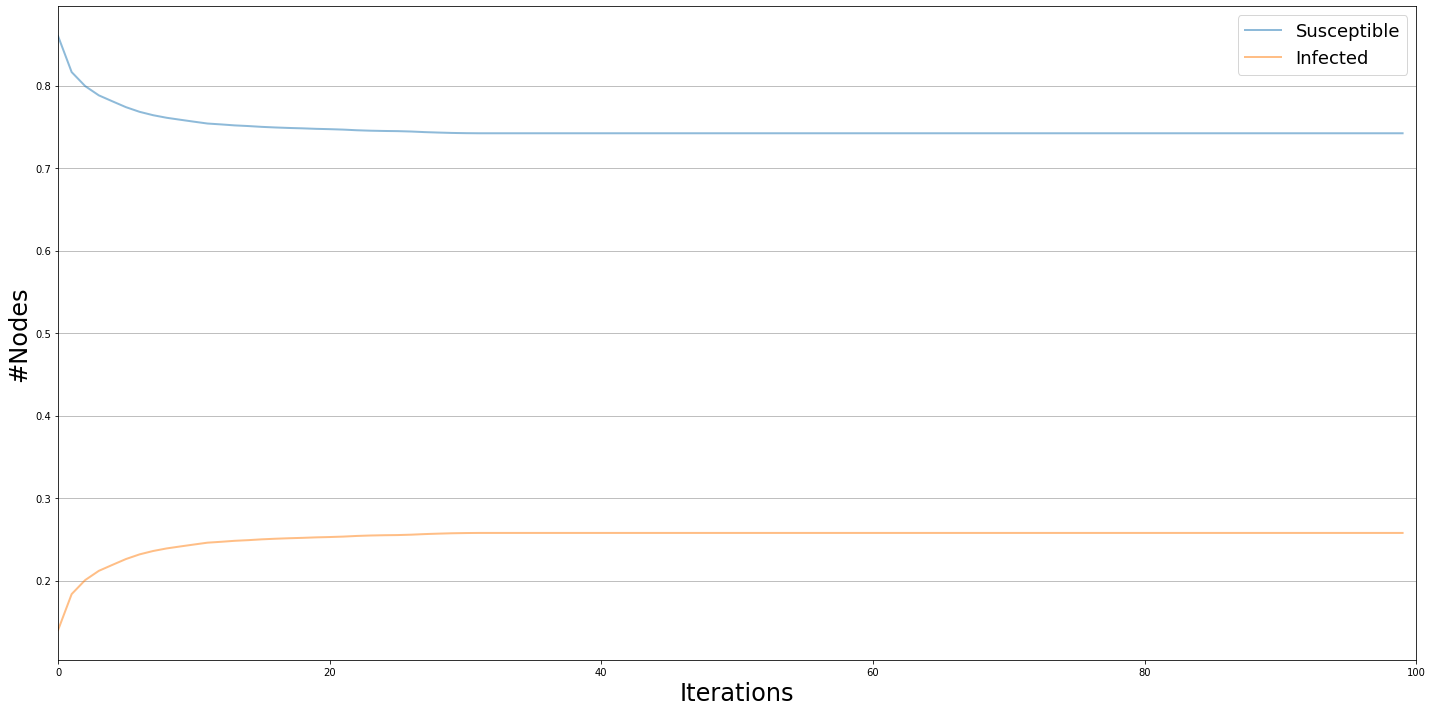

In [23]:
viz = DiffusionTrend(model, trends)
viz.plot()

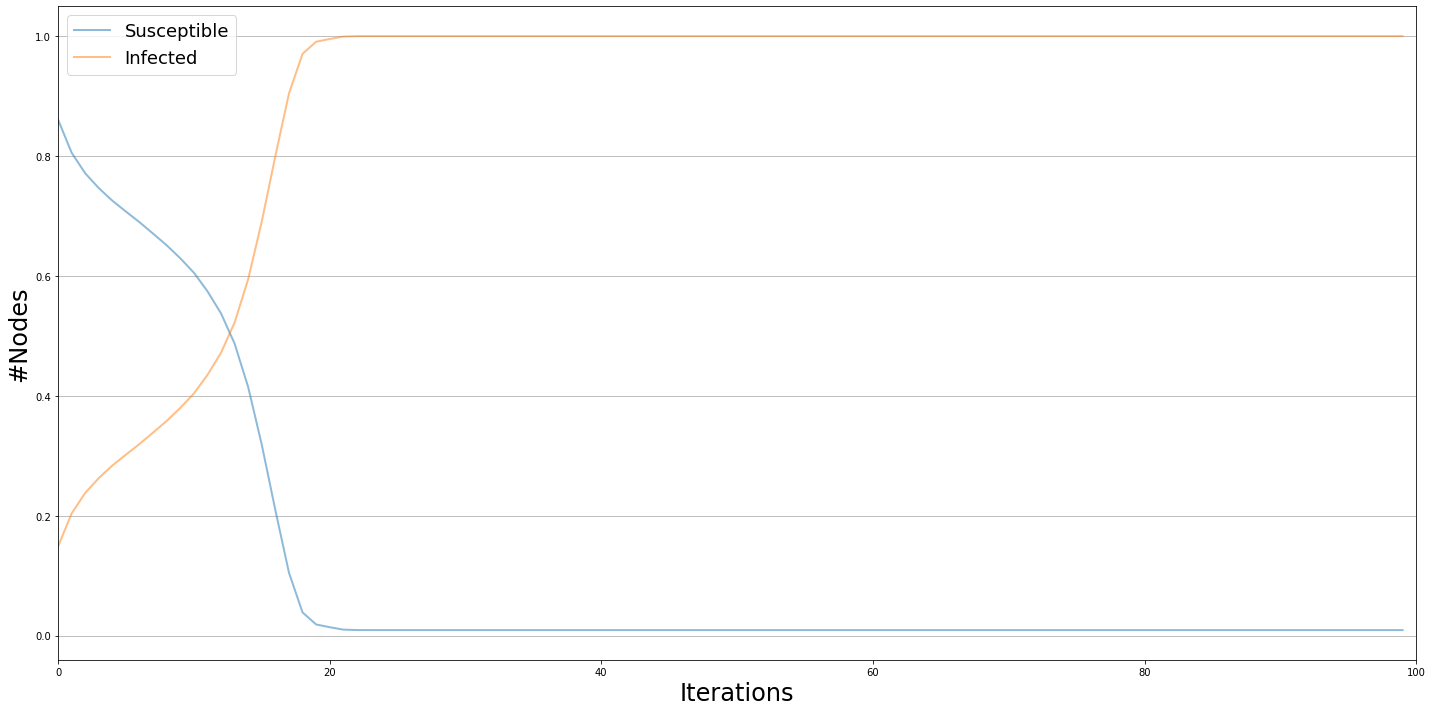

In [24]:
viz = DiffusionTrend(modelb, trendsb)
viz.plot()

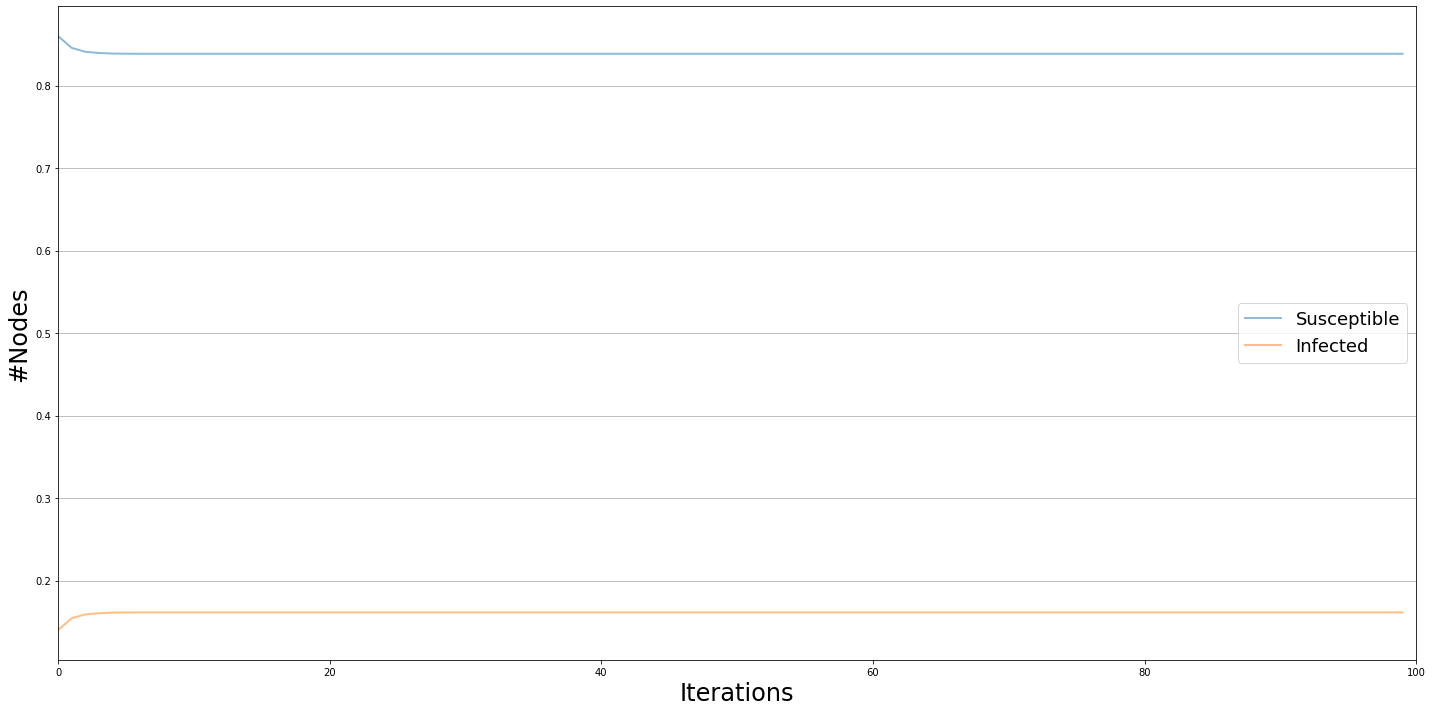

In [25]:
%matplotlib inline
viz = DiffusionTrend(modelER, trendsER)
viz.plot()

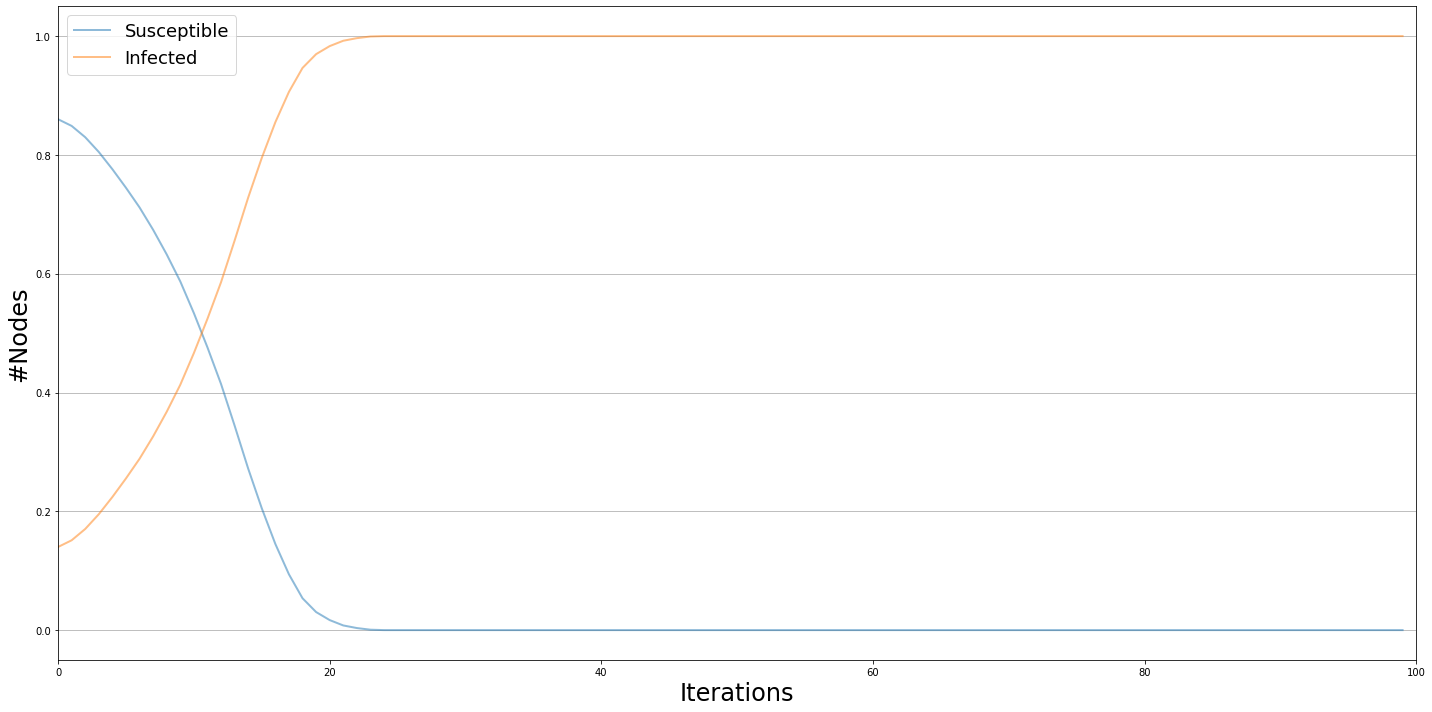

In [26]:
%matplotlib inline
viz = DiffusionTrend(modelWS, trendsWS)
viz.plot()

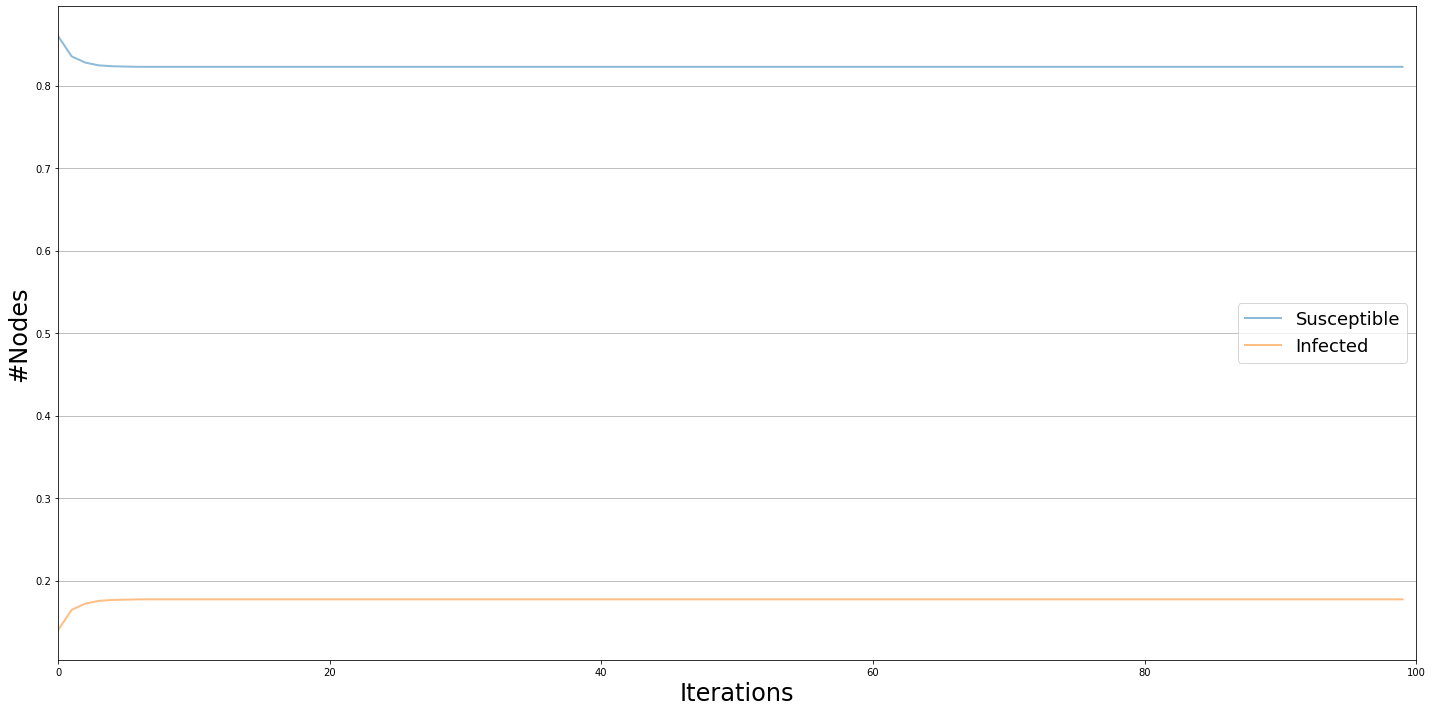

In [27]:
%matplotlib inline
viz = DiffusionTrend(modelBA, trendsBA)
viz.plot()

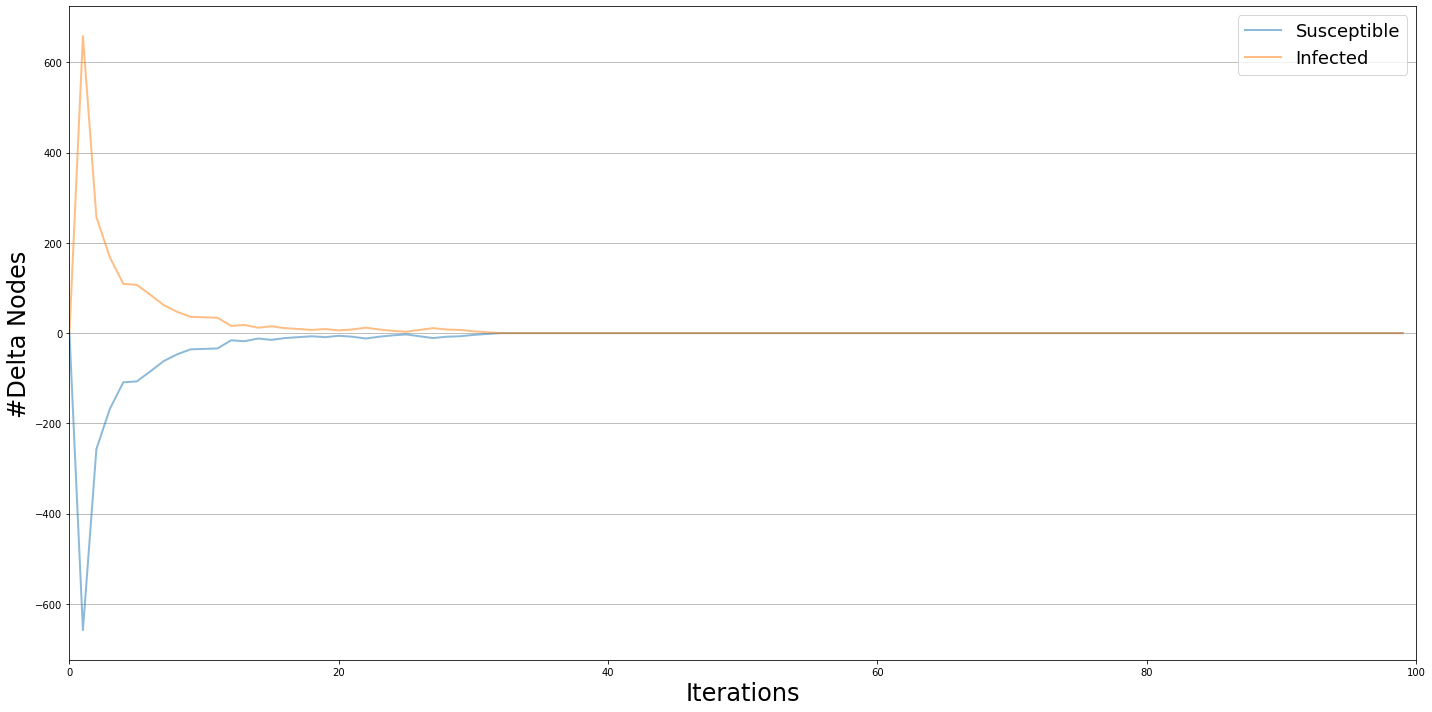

In [28]:
viz = DiffusionPrevalence(model, trends)
viz.plot()

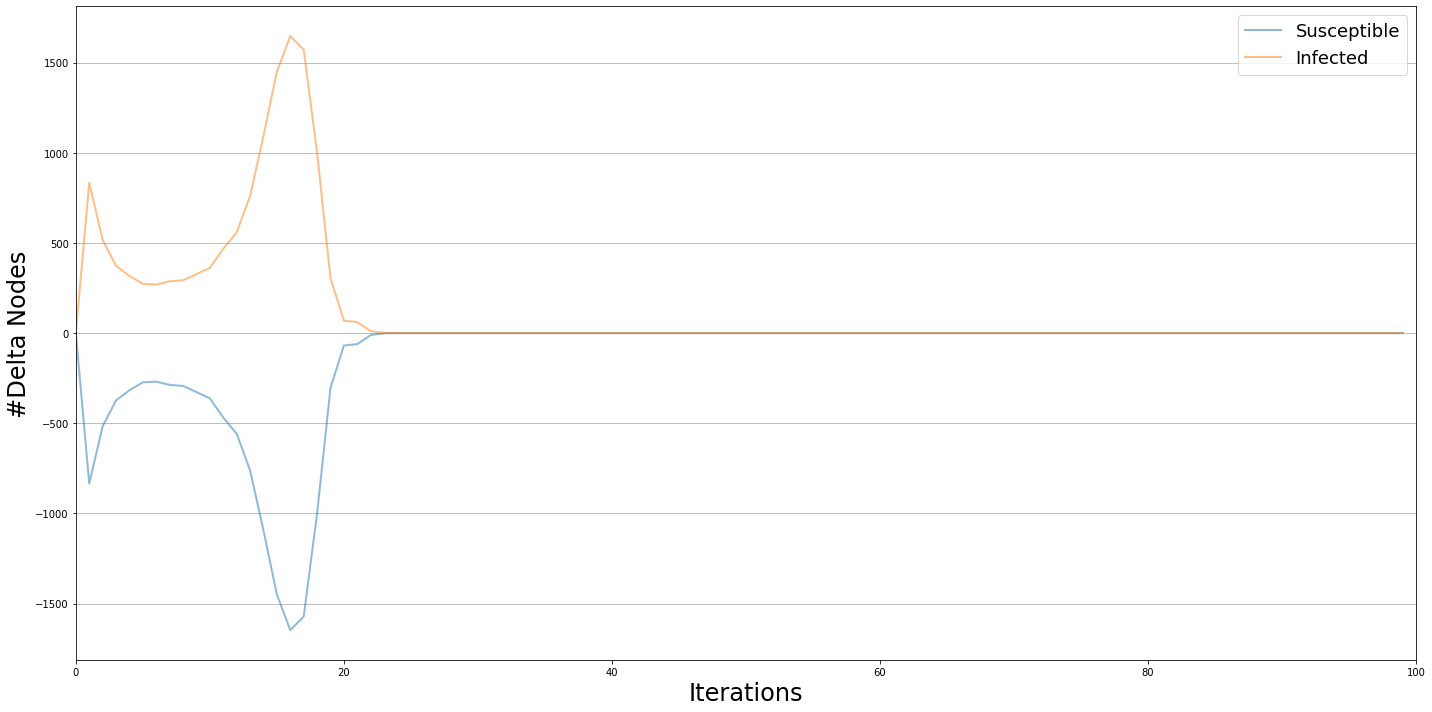

In [29]:
%matplotlib inline
viz = DiffusionPrevalence(modelb, trendsb)
viz.plot()

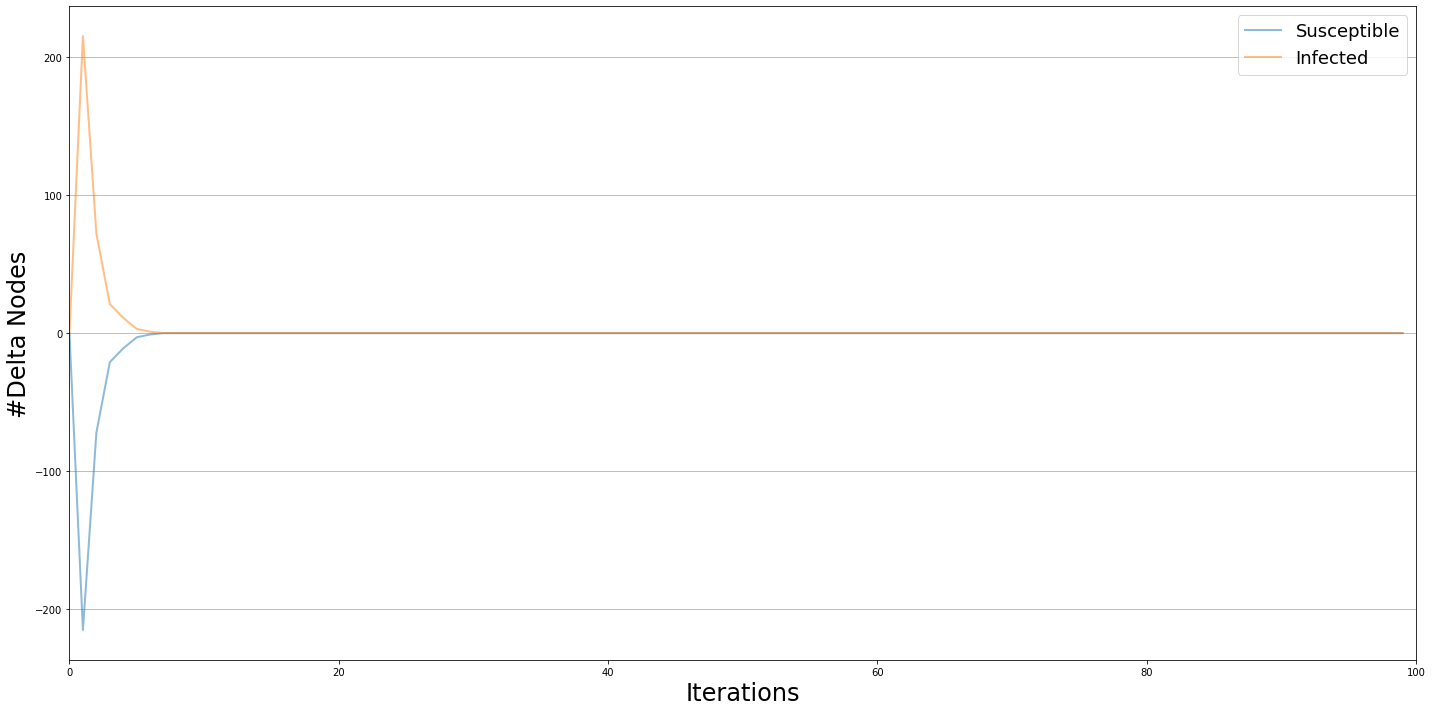

In [30]:
%matplotlib inline
viz = DiffusionPrevalence(modelER, trendsER)
viz.plot()

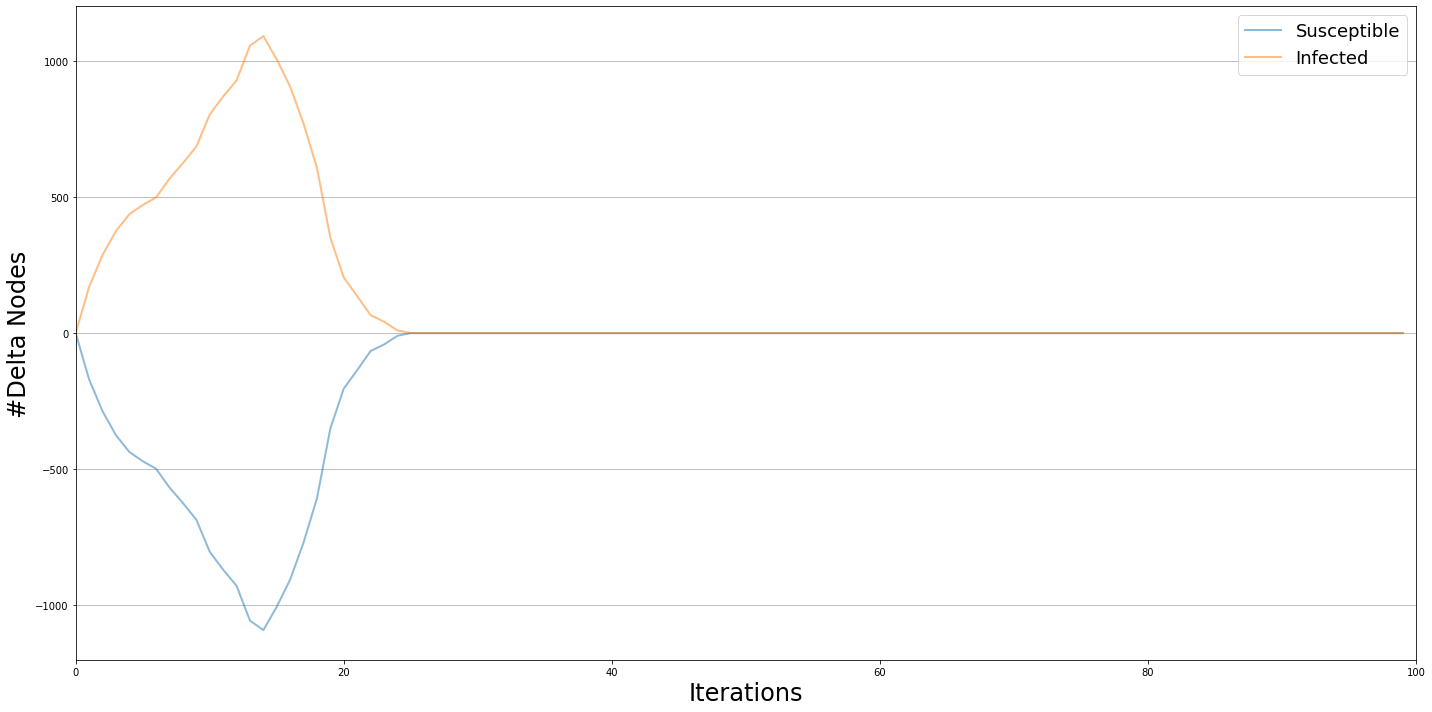

In [31]:
%matplotlib inline
viz = DiffusionPrevalence(modelWS, trendsWS)
viz.plot()

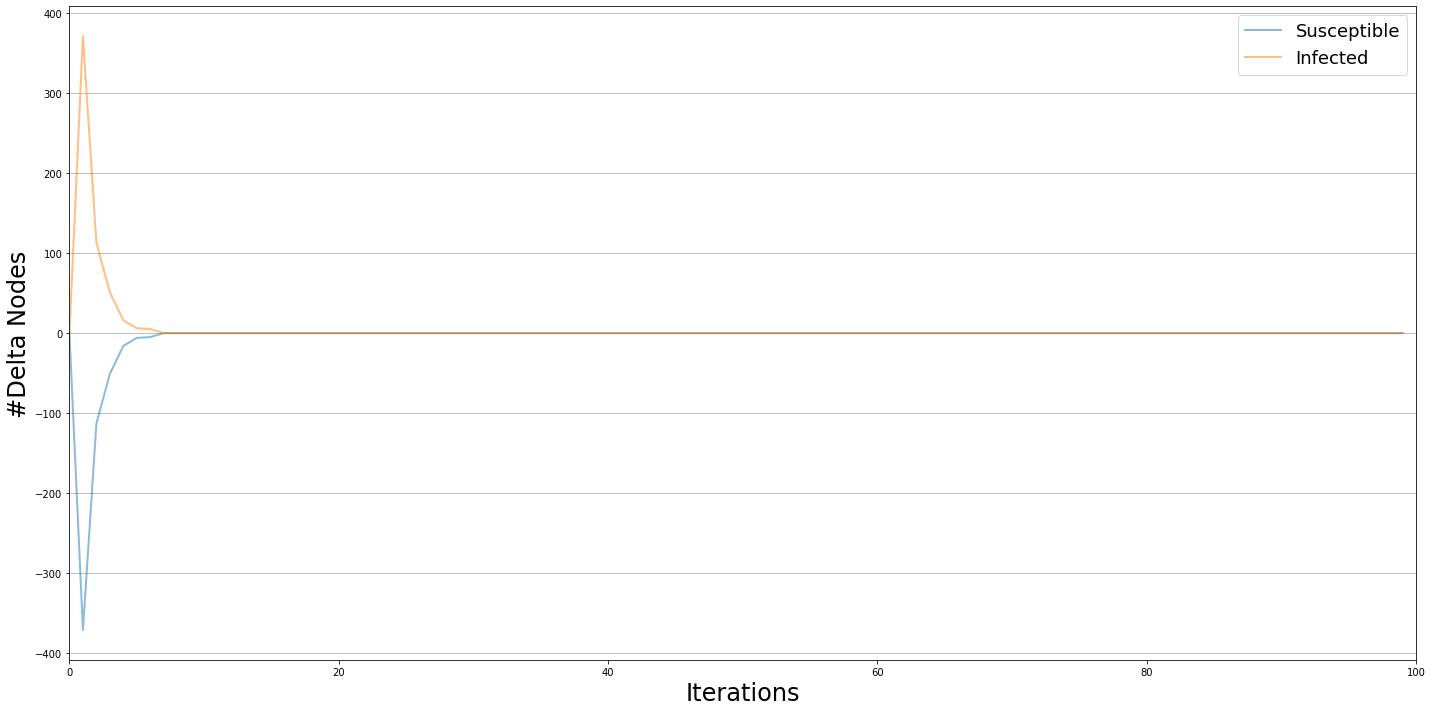

In [32]:
%matplotlib inline
viz = DiffusionPrevalence(modelBA, trendsBA)
viz.plot()

<a id="sir"></a>
### Kertesz Threshold Model:

The authors extend the classical model introducing a density r of blocked nodes – nodes which are immune to social influence – and a probability of spontaneous adoption p to capture external influence.

In [33]:
model   = ep.KerteszThresholdModel(g)
modelb  = ep.KerteszThresholdModel(g) 
modelER = ep.KerteszThresholdModel(ER)
modelWS = ep.KerteszThresholdModel(WS)
modelBA = ep.KerteszThresholdModel(BA)

In [34]:
config   = mc.Configuration()
config.add_model_parameter('adopter_rate', 0.005)
config.add_model_parameter('percentage_blocked', 0.05)
configb  = config
configb.add_model_initial_configuration("Infected", vegan_nodes)
config.add_model_parameter('fraction_infected', 0.14)
configER = config
configWS = config
configBA = config

threshold = 0.35

for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)
model.set_initial_status(config)

for i in g.nodes():
    configb.add_node_configuration("threshold", i, threshold)
modelb.set_initial_status(configb)

for i in ER.nodes():
    configER.add_node_configuration("threshold", i, threshold)
modelER.set_initial_status(configER)

for i in WS.nodes():
    configWS.add_node_configuration("threshold", i, threshold)
modelWS.set_initial_status(configWS)

for i in BA.nodes():
    configBA.add_node_configuration("threshold", i, threshold)
modelBA.set_initial_status(configBA)

In [35]:
iterations   = model.iteration_bunch(100, node_status=True)
iterationsb  = modelb.iteration_bunch(100, node_status=True)
iterationsER = modelER.iteration_bunch(100, node_status=True)
iterationsWS = modelWS.iteration_bunch(100, node_status=True)
iterationsBA = modelBA.iteration_bunch(100, node_status=True)

trends   = model.build_trends(iterations)
trendsb  = modelb.build_trends(iterationsb)
trendsER = modelER.build_trends(iterationsER)
trendsWS = modelWS.build_trends(iterationsWS)
trendsBA = modelBA.build_trends(iterationsBA)

100%|██████████| 100/100 [02:10<00:00,  1.31s/it]


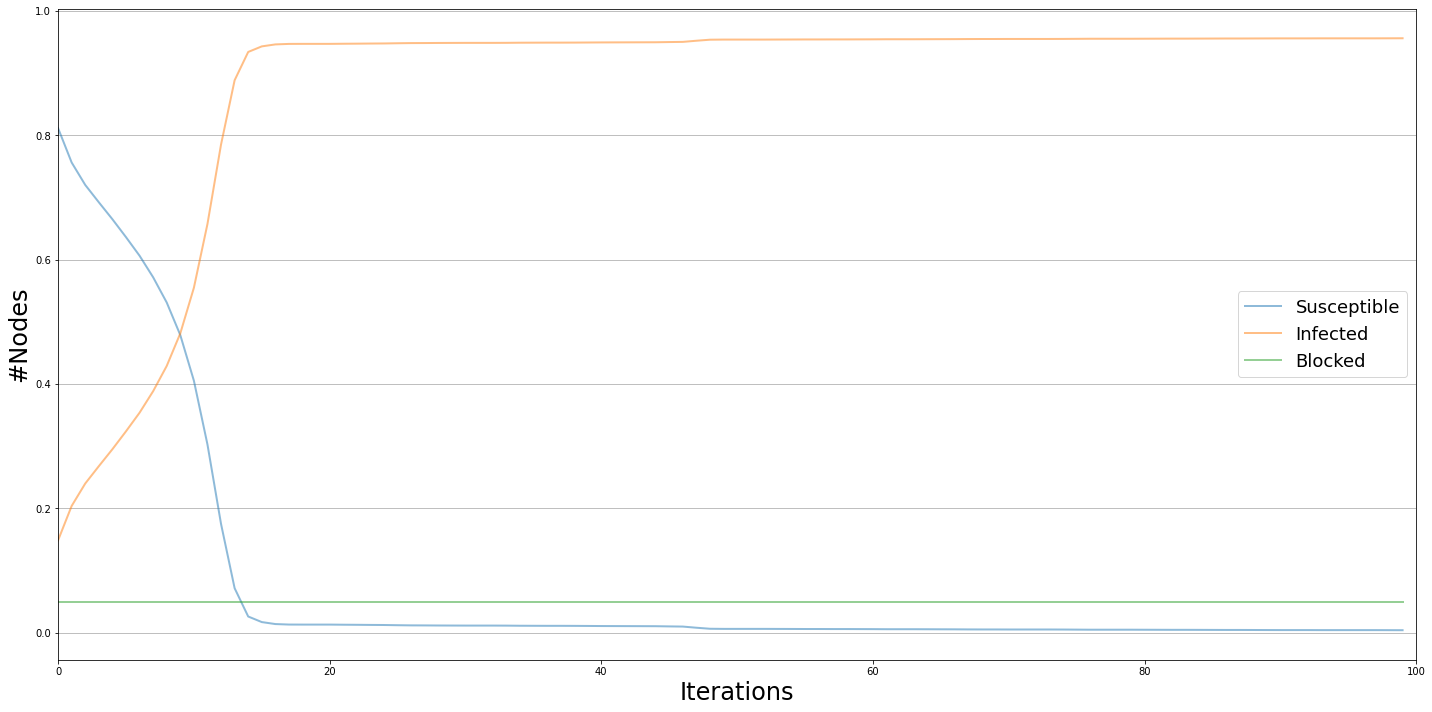

In [36]:
viz = DiffusionTrend(model, trends)
viz.plot()

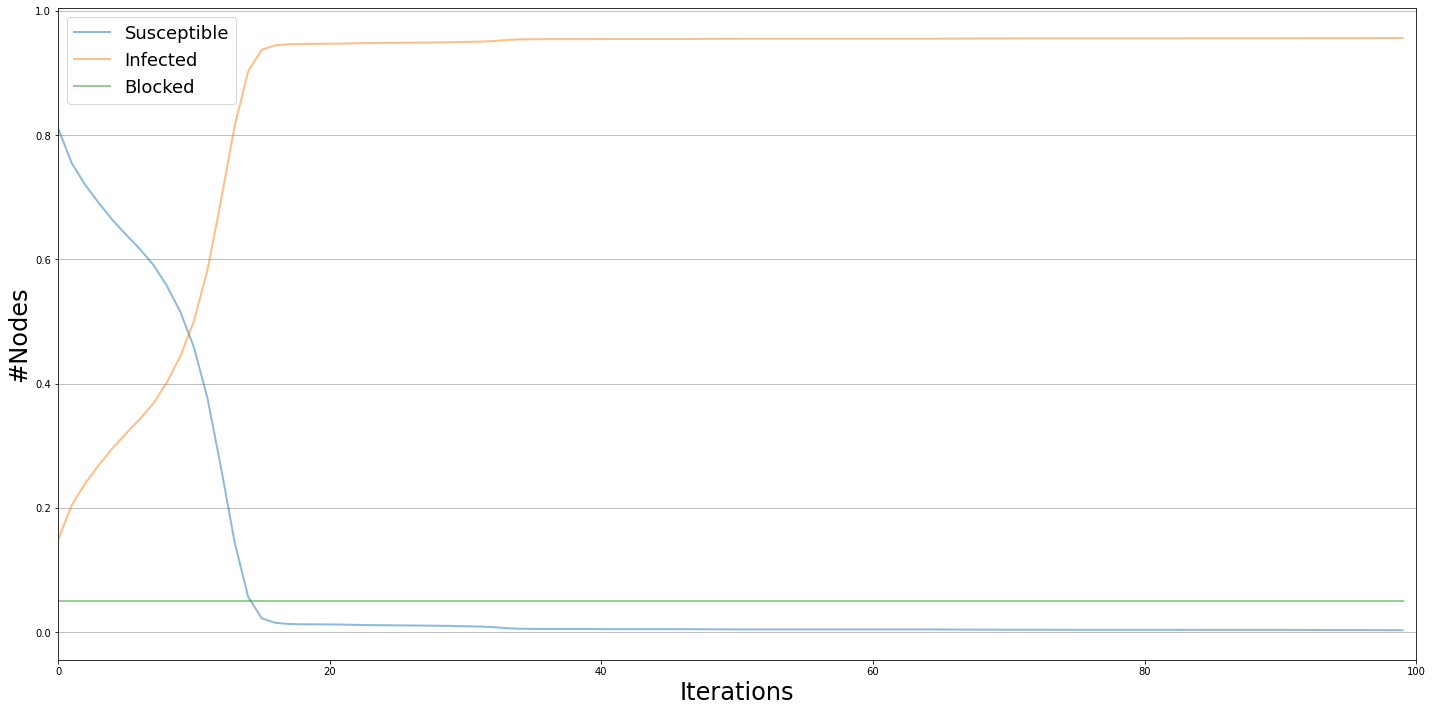

In [37]:
viz = DiffusionTrend(modelb, trendsb)
viz.plot()

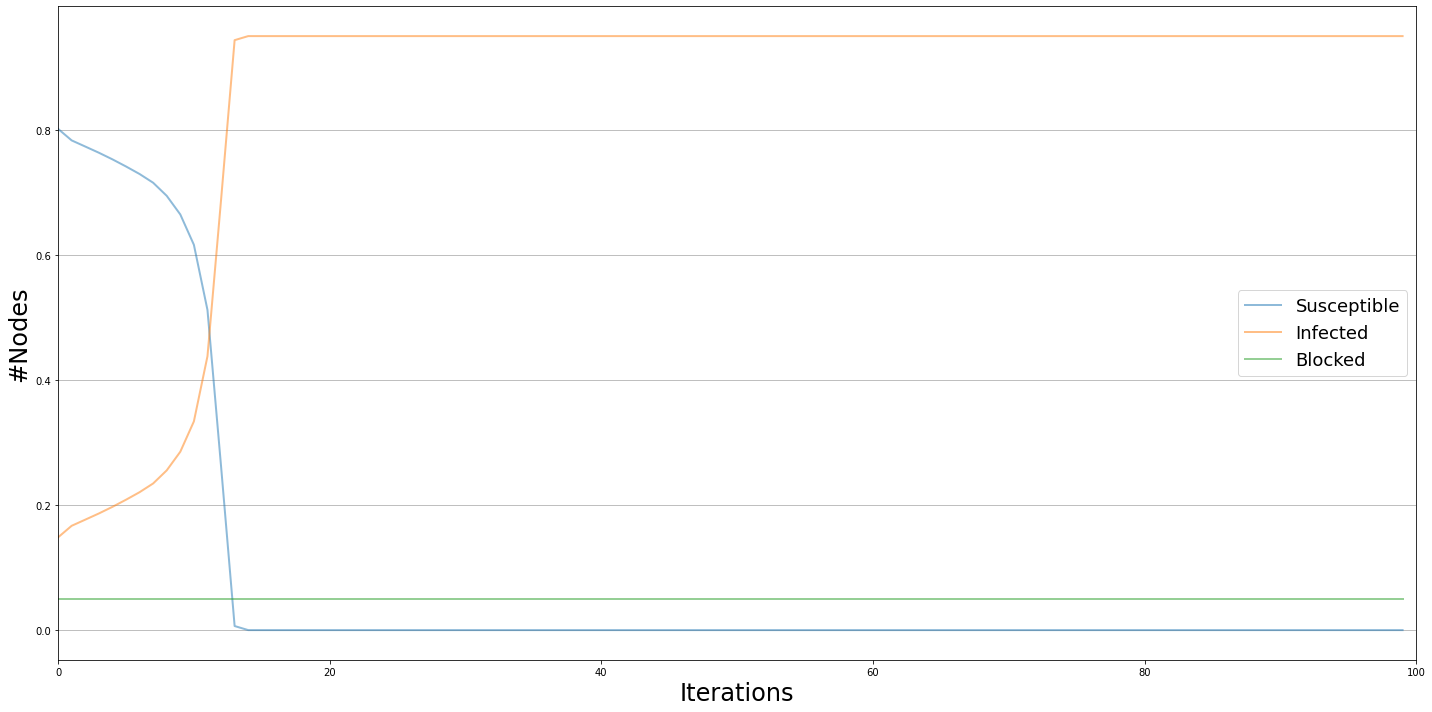

In [38]:
%matplotlib inline
viz = DiffusionTrend(modelER, trendsER)
viz.plot()

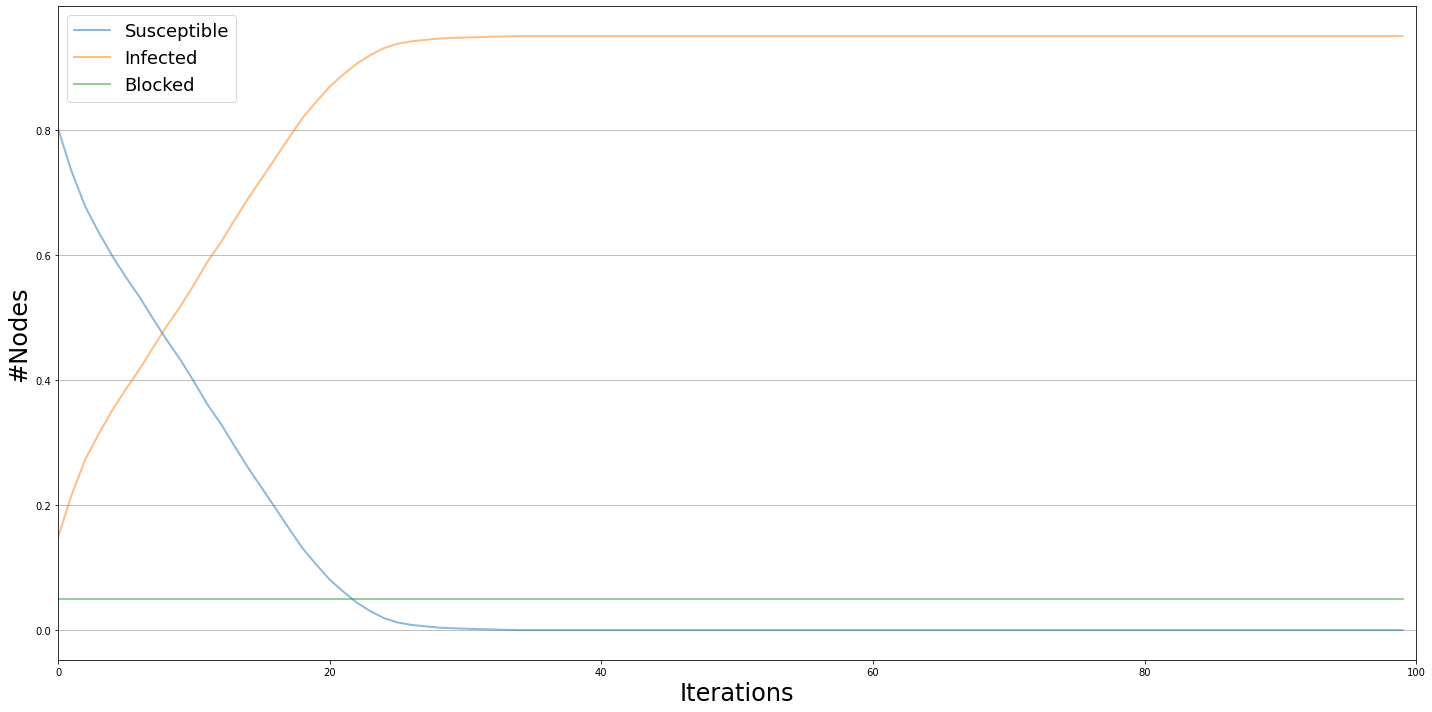

In [39]:
%matplotlib inline
viz = DiffusionTrend(modelWS, trendsWS)
viz.plot()

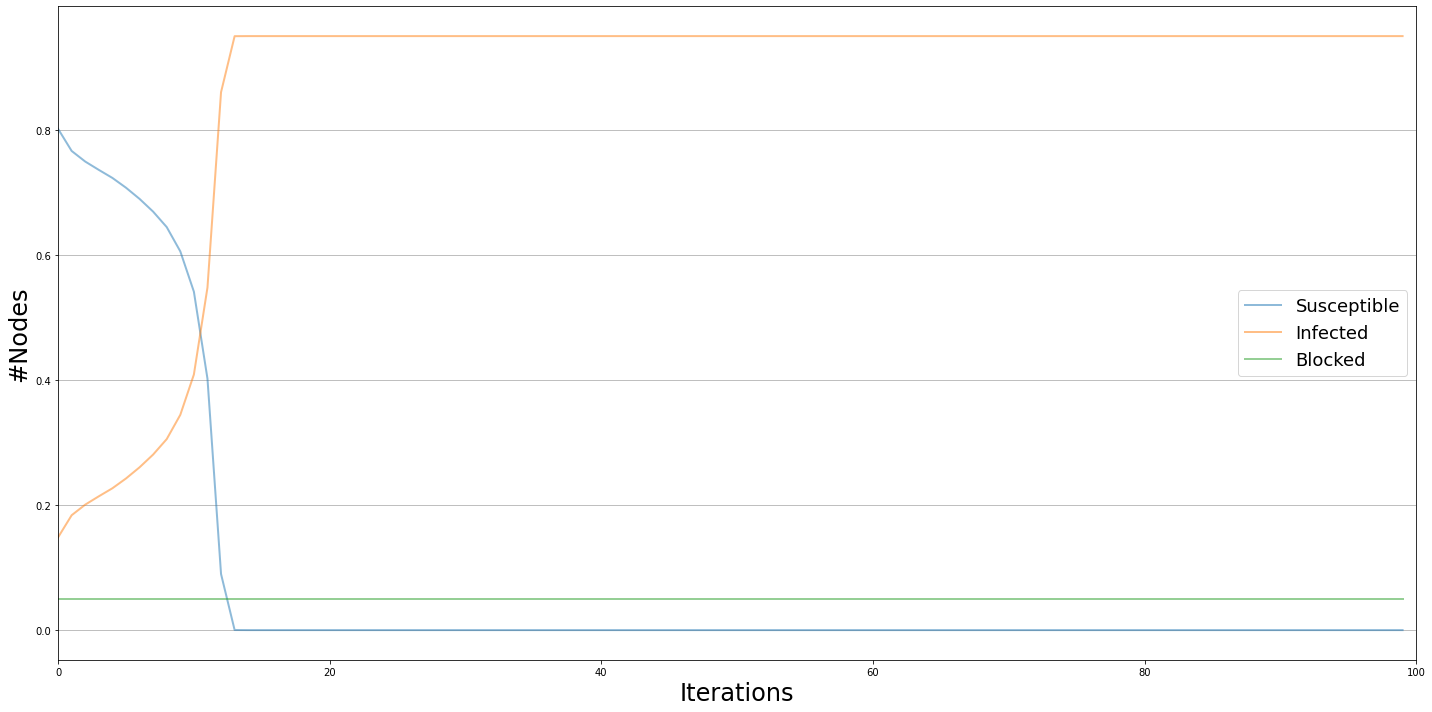

In [40]:
%matplotlib inline
viz = DiffusionTrend(modelBA, trendsBA)
viz.plot()

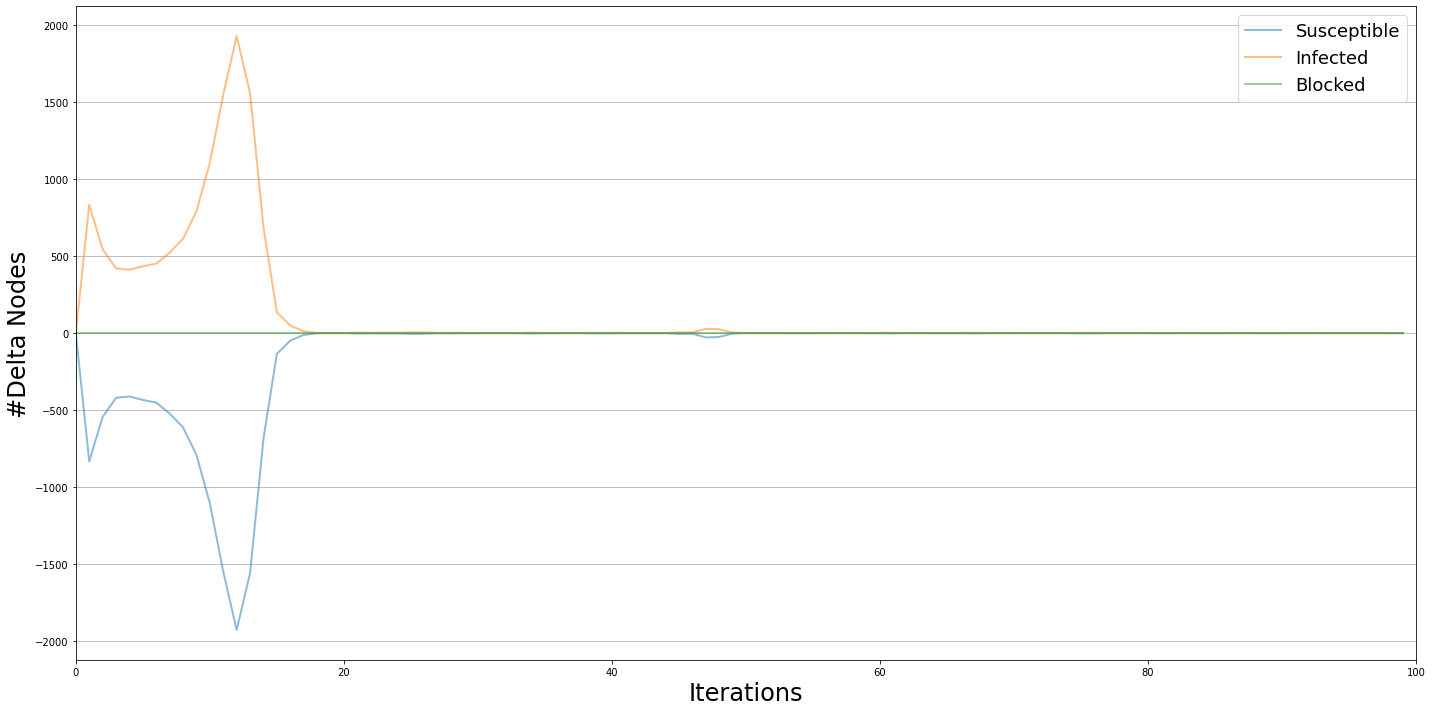

In [41]:
viz = DiffusionPrevalence(model, trends)
viz.plot()

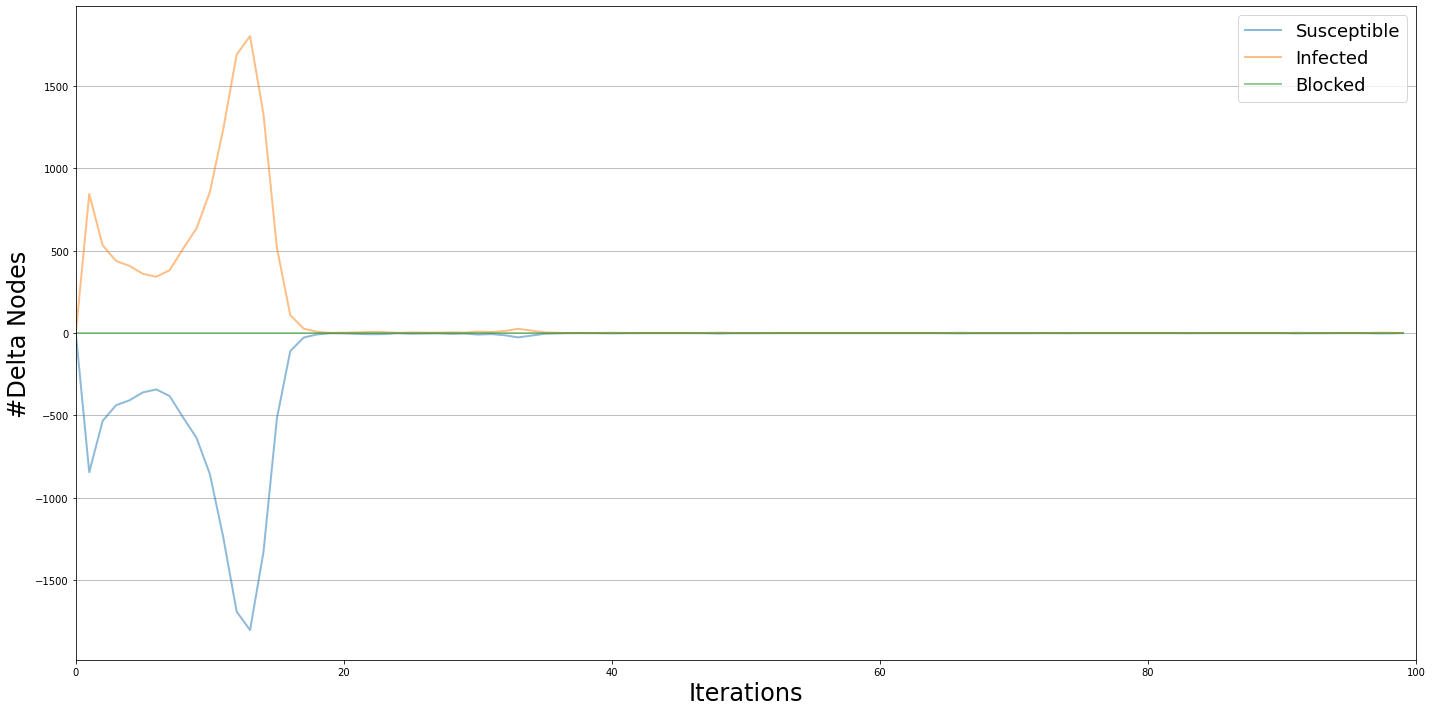

In [42]:
%matplotlib inline
viz = DiffusionPrevalence(modelb, trendsb)
viz.plot()

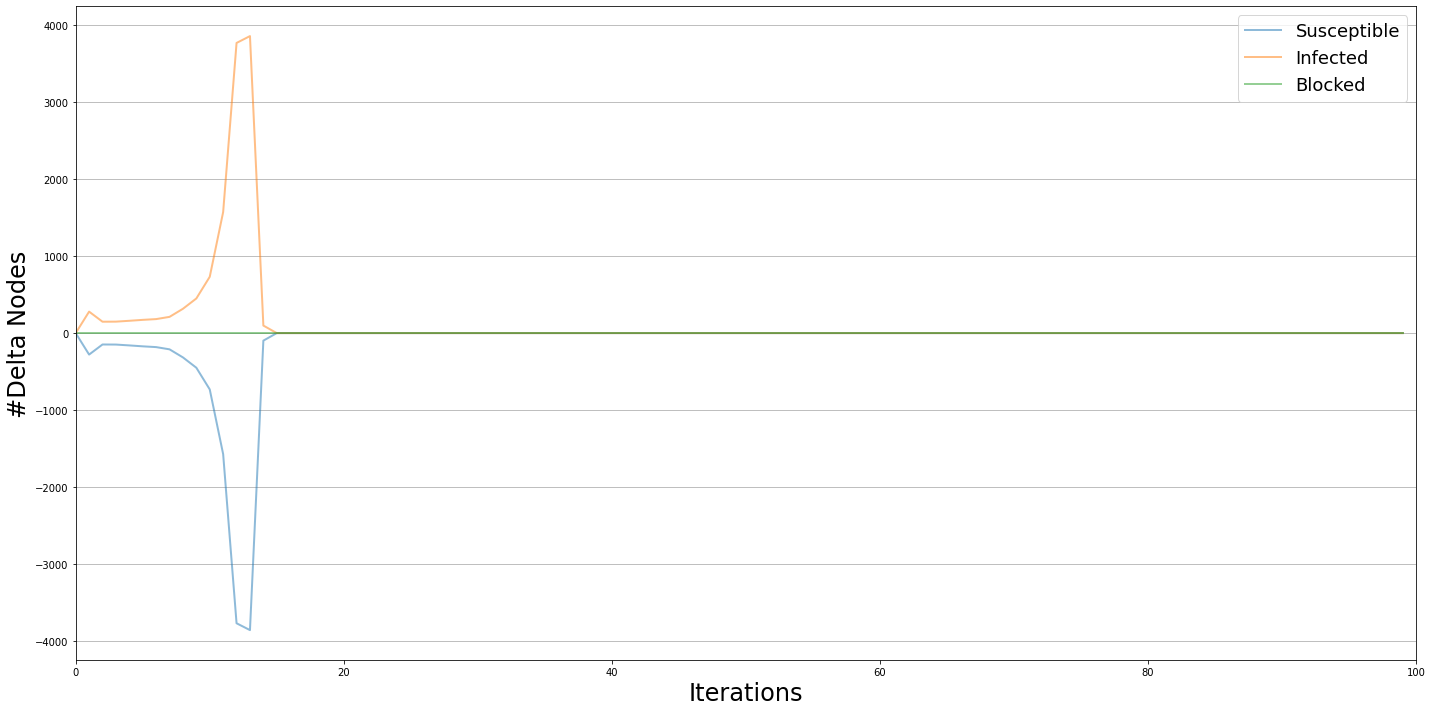

In [43]:
%matplotlib inline
viz = DiffusionPrevalence(modelER, trendsER)
viz.plot()

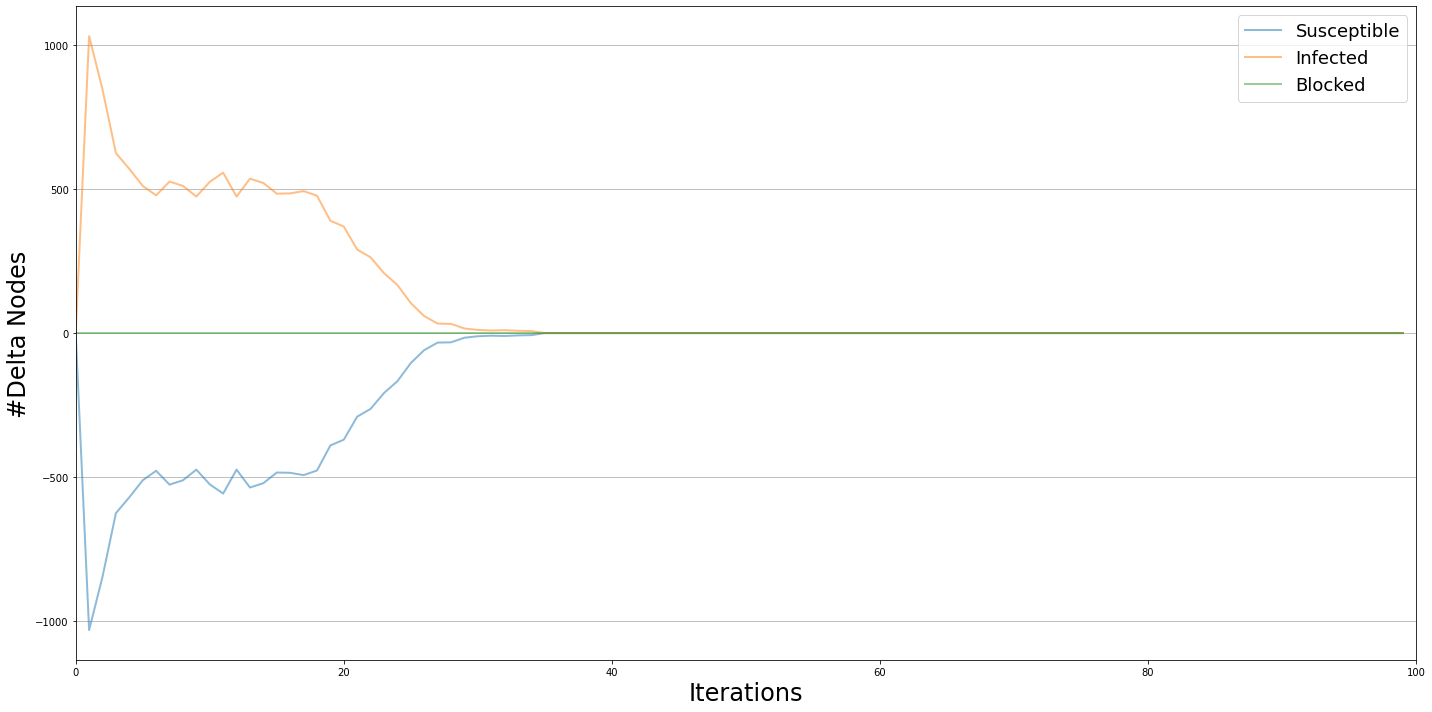

In [44]:
%matplotlib inline
viz = DiffusionPrevalence(modelWS, trendsWS)
viz.plot()

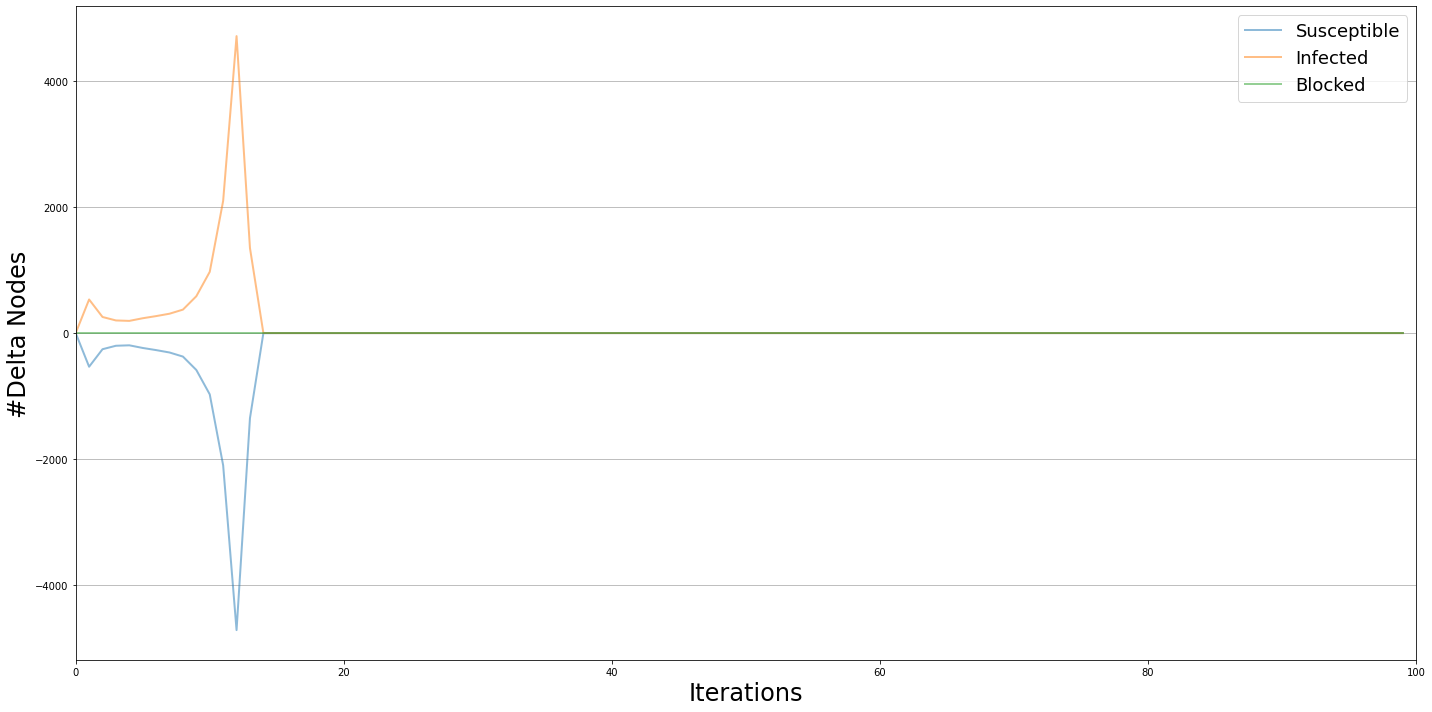

In [45]:
%matplotlib inline
viz = DiffusionPrevalence(modelBA, trendsBA)
viz.plot()

<a id="sir"></a>
### Profile Threshold Model:

The Profile-Threshold model assumes the existence of node profiles that act as preferential schemas for individual tastes but relax the constraints imposed by the Profile model by letting nodes influenceable via peer pressure mechanisms.

In [46]:
model   = ep.ProfileThresholdModel(g)
modelb  = ep.ProfileThresholdModel(g) 
modelER = ep.ProfileThresholdModel(ER)
modelWS = ep.ProfileThresholdModel(WS)
modelBA = ep.ProfileThresholdModel(BA)

In [47]:
config   = mc.Configuration()
config.add_model_parameter('blocked', 0.01)
config.add_model_parameter('adopter_rate', 0.001)
configb  = config
configb.add_model_initial_configuration("Infected", vegan_nodes)
config.add_model_parameter('fraction_infected', 0.14)
configER = config
configWS = config
configBA = config

threshold = 0.35
profile = 0.15

for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)
    config.add_node_configuration("profile", i, profile)
model.set_initial_status(config)

for i in g.nodes():
    configb.add_node_configuration("threshold", i, threshold)
    configb.add_node_configuration("profile", i, profile)
modelb.set_initial_status(configb)

for i in ER.nodes():
    configER.add_node_configuration("threshold", i, threshold)
    configER.add_node_configuration("profile", i, profile)
modelER.set_initial_status(configER)

for i in WS.nodes():
    configWS.add_node_configuration("threshold", i, threshold)
    configWS.add_node_configuration("profile", i, profile)
modelWS.set_initial_status(configWS)

for i in BA.nodes():
    configBA.add_node_configuration("threshold", i, threshold)
    configBA.add_node_configuration("profile", i, profile)
modelBA.set_initial_status(configBA)


In [48]:
iterations   = model.iteration_bunch(100, node_status=True)
iterationsb  = modelb.iteration_bunch(100, node_status=True)
iterationsER = modelER.iteration_bunch(100, node_status=True)
iterationsWS = modelWS.iteration_bunch(200, node_status=True)
iterationsBA = modelBA.iteration_bunch(100, node_status=True)

trends   = model.build_trends(iterations)
trendsb  = modelb.build_trends(iterationsb)
trendsER = modelER.build_trends(iterationsER)
trendsWS = modelWS.build_trends(iterationsWS)
trendsBA = modelBA.build_trends(iterationsBA)

100%|██████████| 100/100 [09:44<00:00,  5.84s/it]


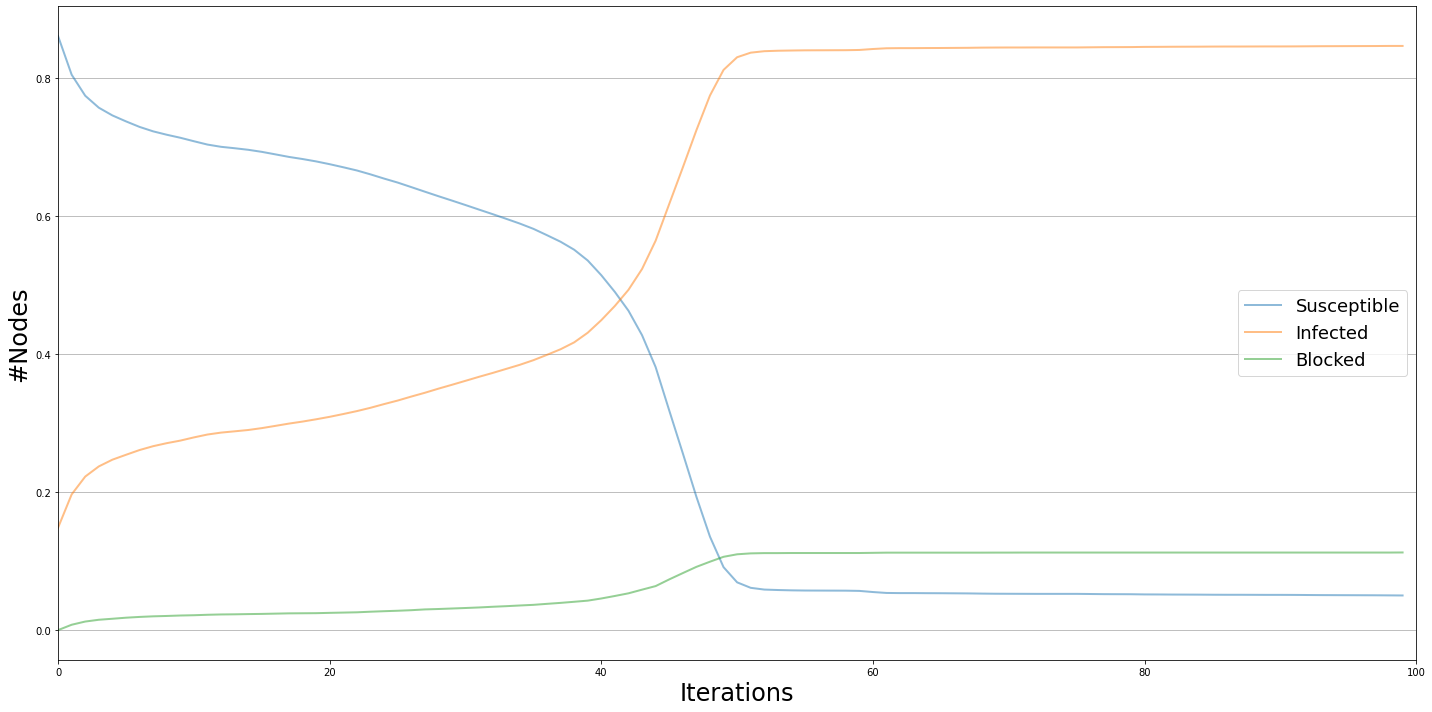

In [49]:
viz = DiffusionTrend(model, trends)
viz.plot()

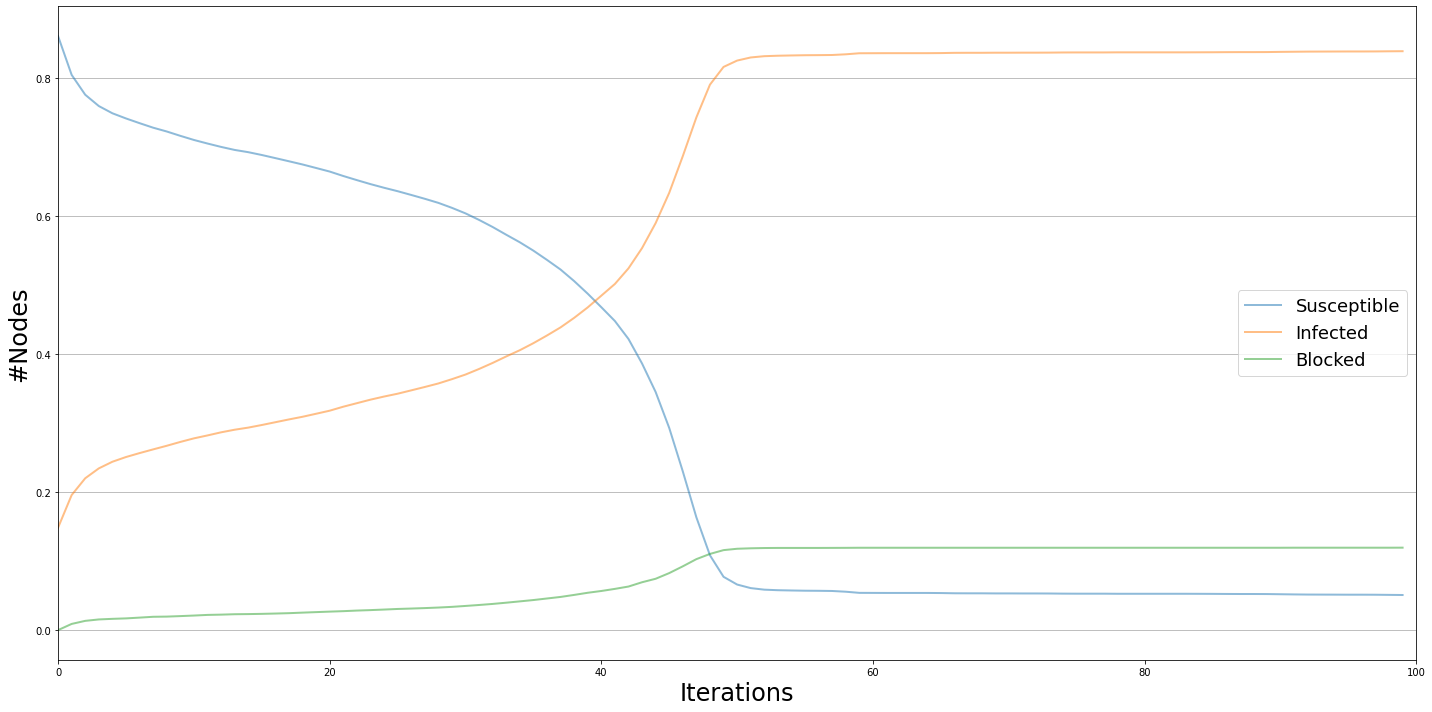

In [50]:
viz = DiffusionTrend(modelb, trendsb)
viz.plot()

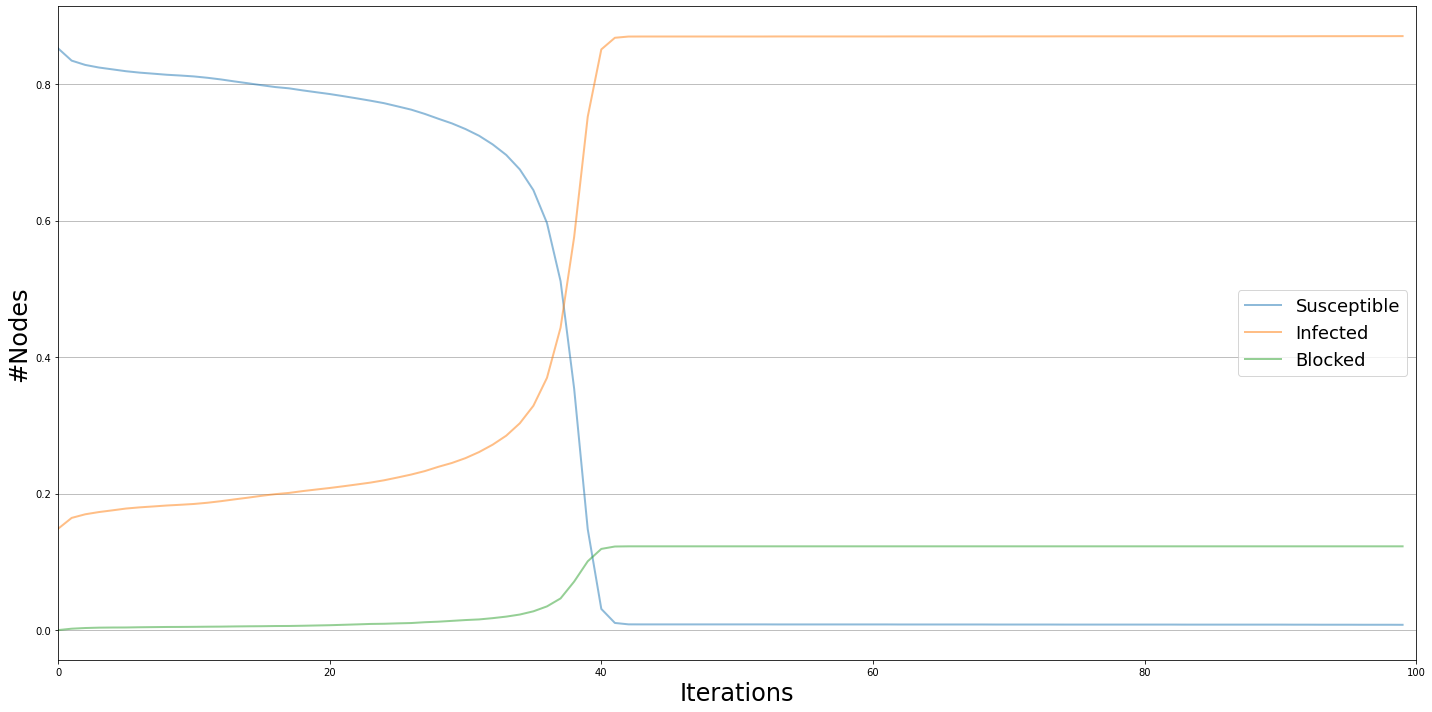

In [51]:
%matplotlib inline
viz = DiffusionTrend(modelER, trendsER)
viz.plot()

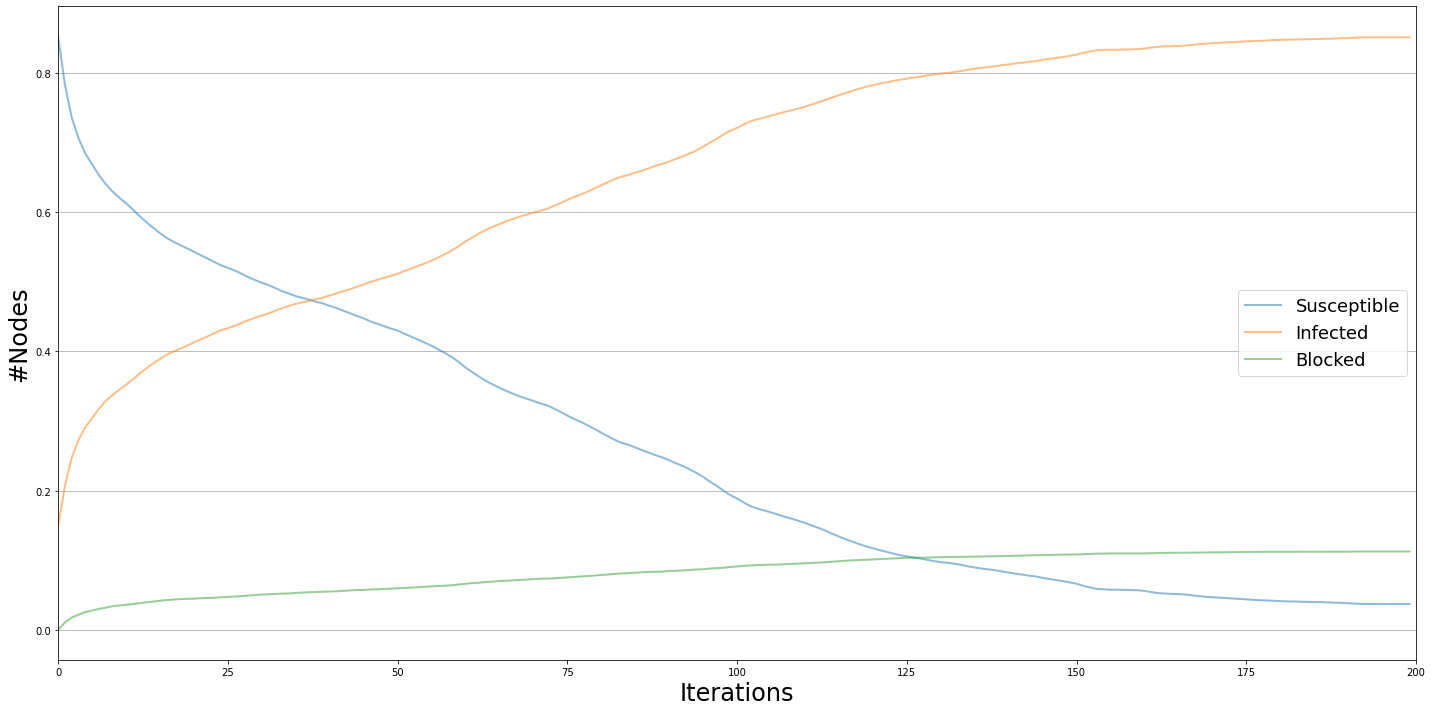

In [52]:
%matplotlib inline
viz = DiffusionTrend(modelWS, trendsWS)
viz.plot()

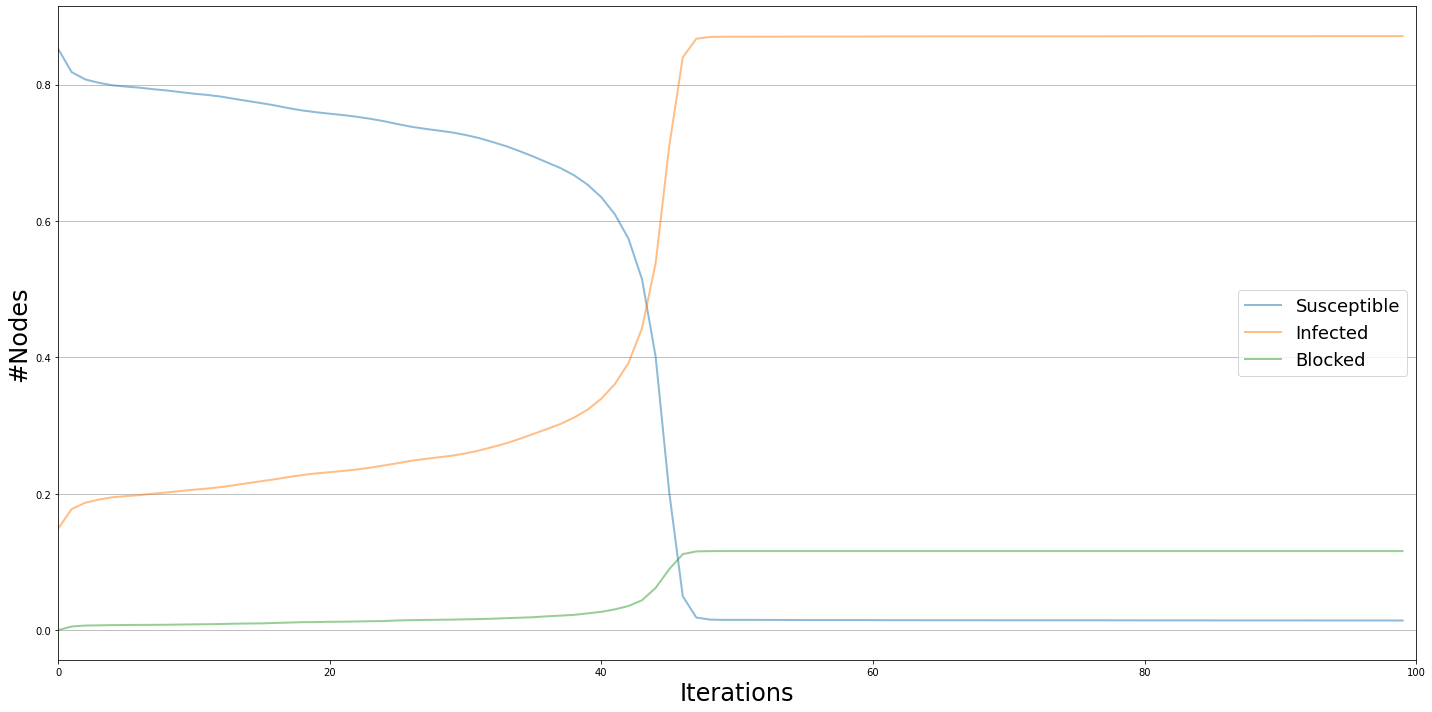

In [53]:
%matplotlib inline
viz = DiffusionTrend(modelBA, trendsBA)
viz.plot()

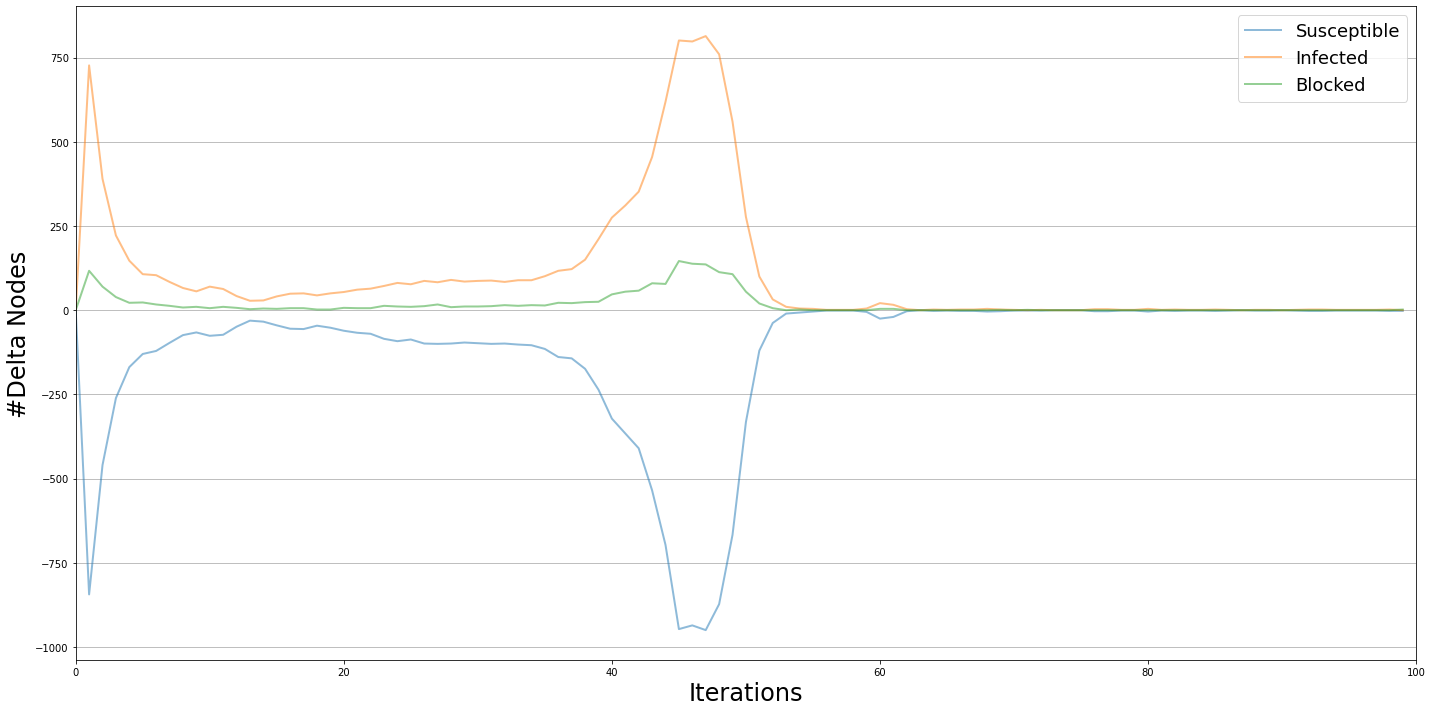

In [54]:
viz = DiffusionPrevalence(model, trends)
viz.plot()

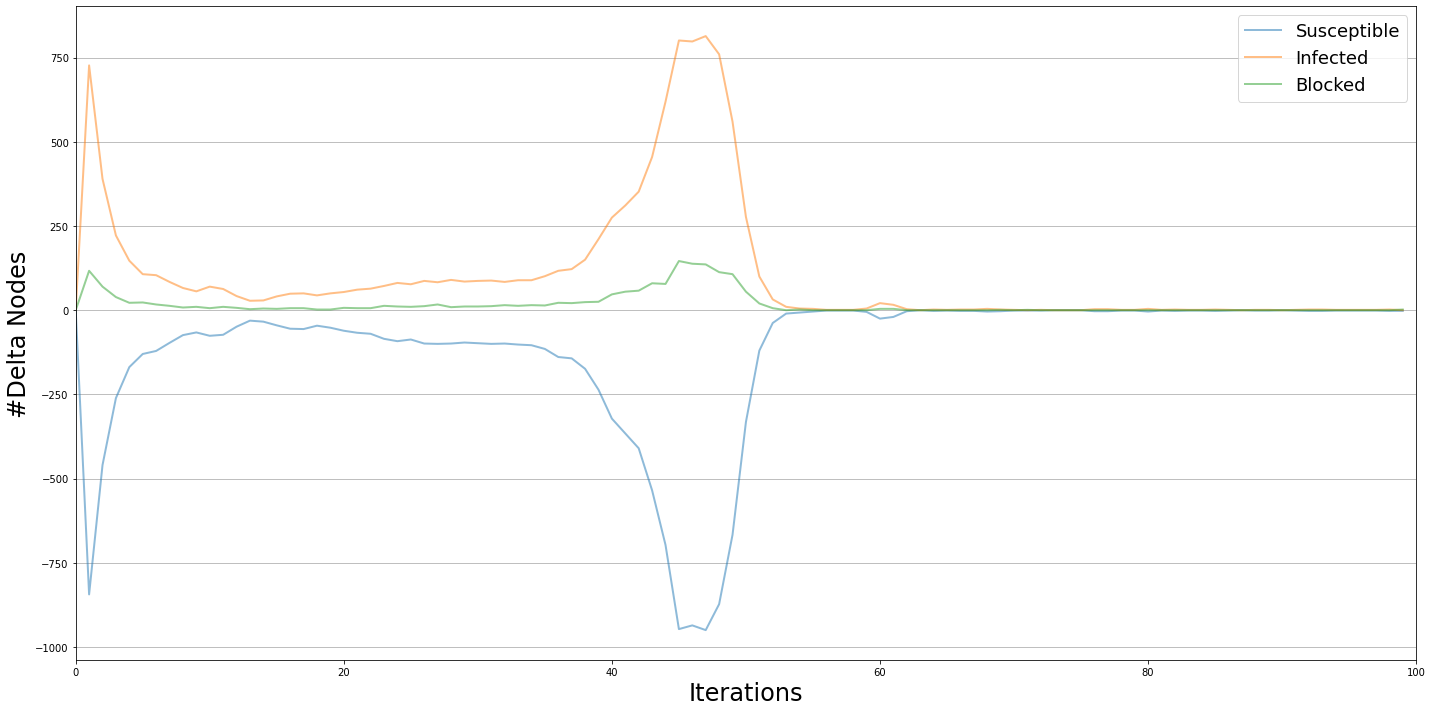

In [55]:
%matplotlib inline
viz = DiffusionPrevalence(model, trends)
viz.plot()

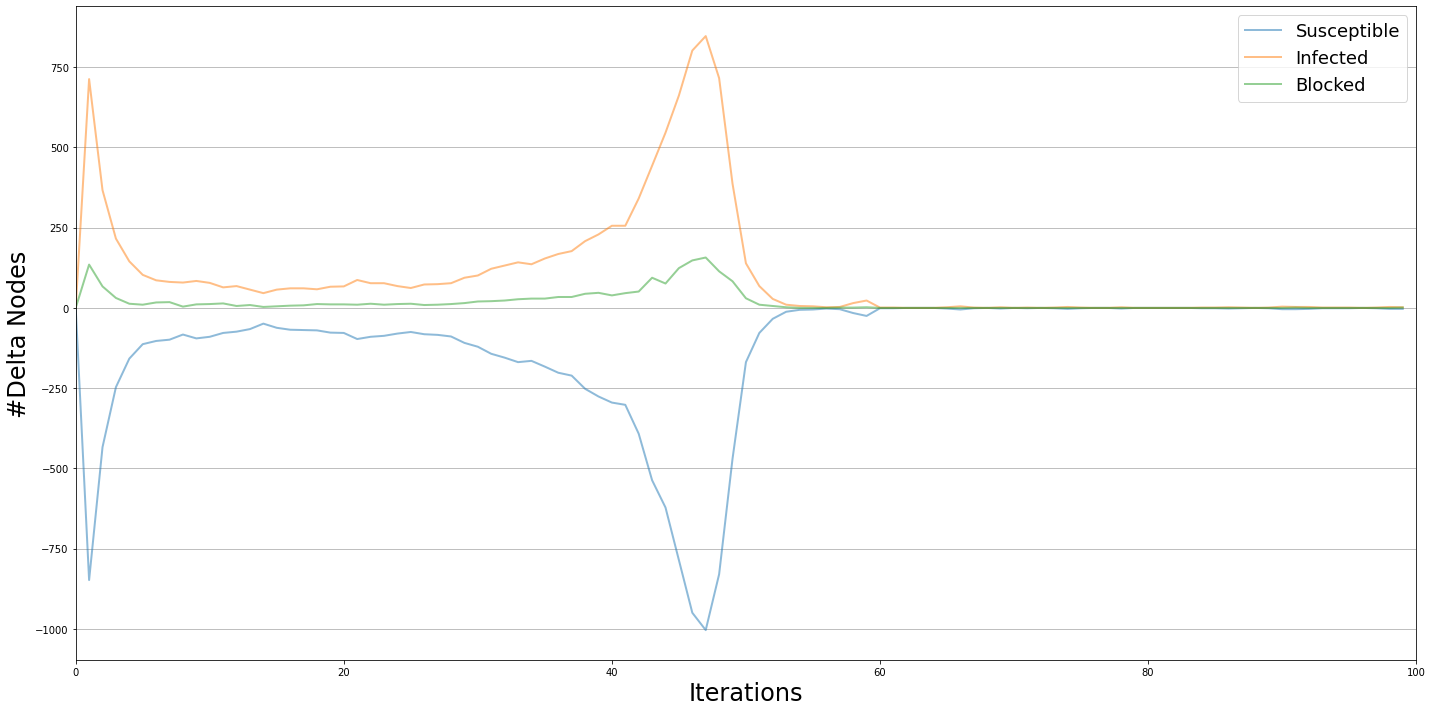

In [56]:
%matplotlib inline
viz = DiffusionPrevalence(modelb, trendsb)
viz.plot()

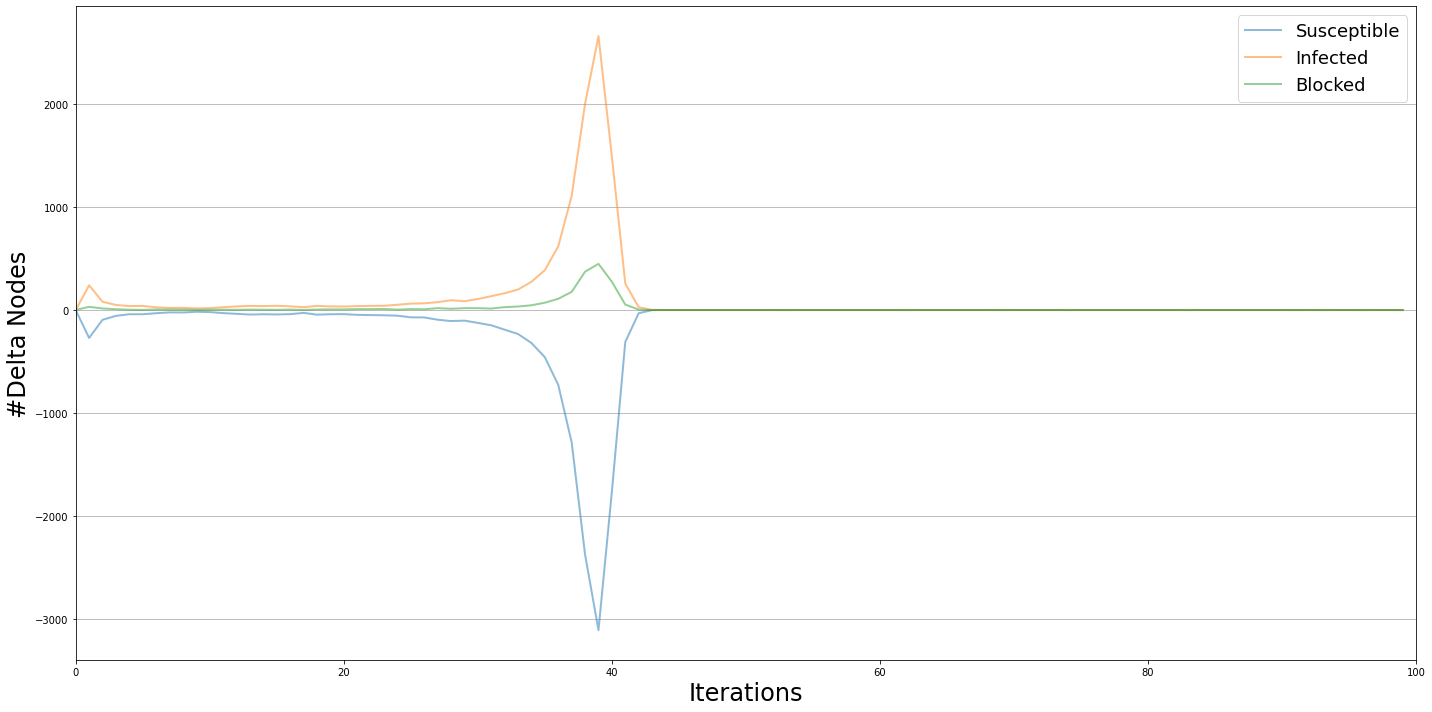

In [57]:
%matplotlib inline
viz = DiffusionPrevalence(modelER, trendsER)
viz.plot()

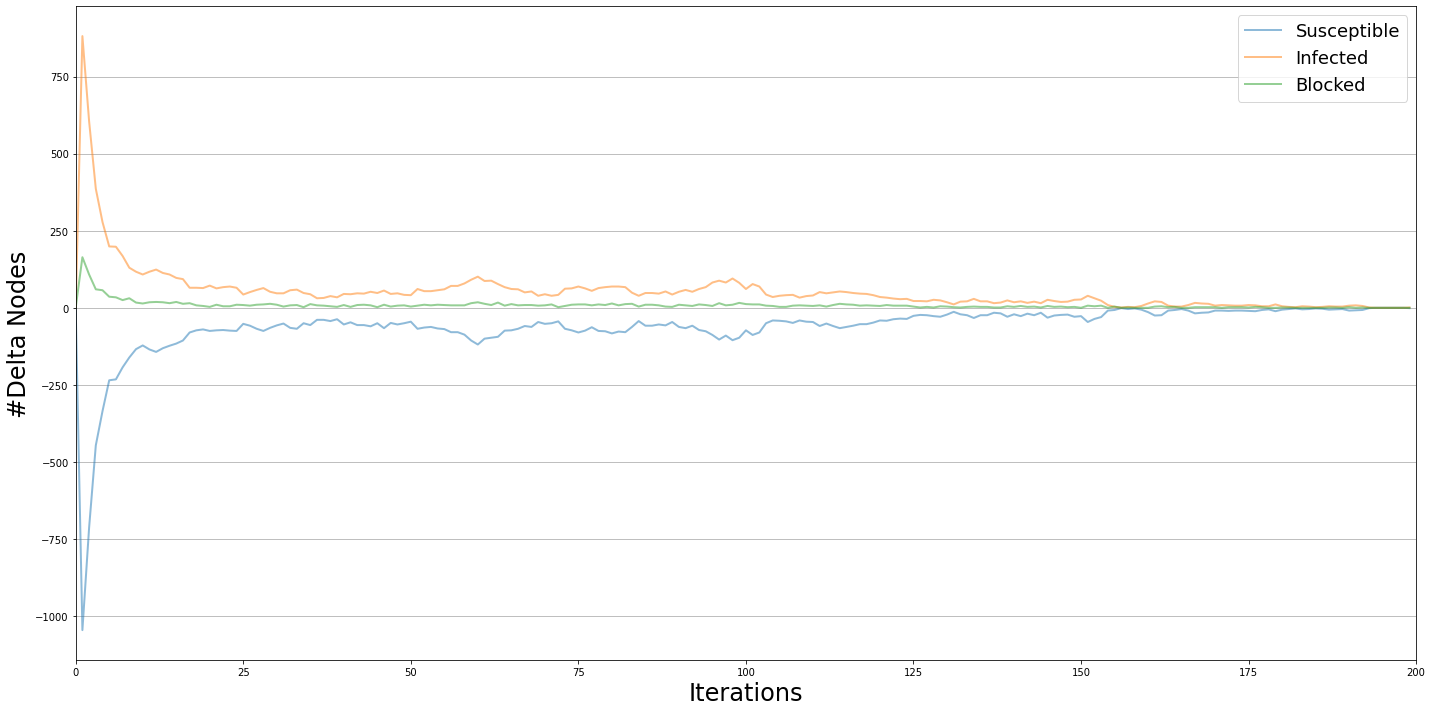

In [58]:
%matplotlib inline
viz = DiffusionPrevalence(modelWS, trendsWS)
viz.plot()

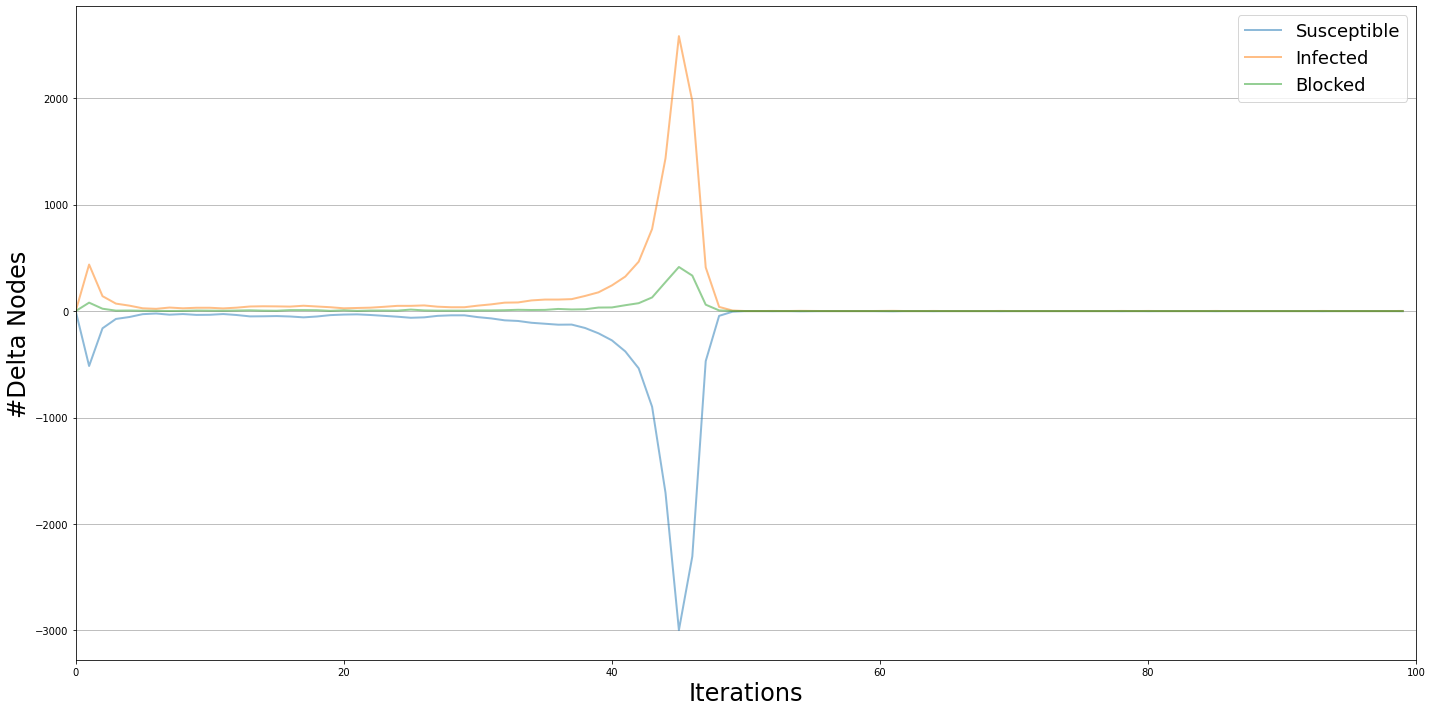

In [59]:
%matplotlib inline
viz = DiffusionPrevalence(modelBA, trendsBA)
viz.plot()